# Actividad I - Exploración y Revisión de un Dataset

Esta actividad propone algunas actividades básicas a realizar con herramientas de Análisis de Datos, también definido como Análisis Exploratorio de Datos (EDA por sus siglas en inglés), sobre un dataset de información de un censo focalizado en datos de viviendas registradas, con diferentes atributos. En particular, esta actividad apunta a revisar y así, conocer las características del dataset, incluyendo algunas actividades de limpieza y pre-procesamiento de datos, para prepararlos para eventuales y posteriores análisis y trabajo con modelos.

## Contexto: Análisis de Datos de Censo (en USA)

Fuente: https://archive.ics.uci.edu/ml/datasets/adult

Este conjunto de datos (abierto para este tipo de usos instruccionales), contiene información de personas que participaron en un censo, con poco más de 32.000 registros de personas censadas, cada una descrita con 14 diferentes atributosatributos, entre los que están:

edad: valor numérico continuo.

clase_laboral: valor categórico

peso_muestra: valor numérico continuo.

... y otros.

La columna 15 del dataset, el **ingreso**, es la variable de interés o etiqueta (binaria = sólo 2 valores), donde se indica que la persona censada tiene un ingreso de hasta 50K USD anuales o su ingreso es mayor de 50K (<=50K o >50K).

Esta adaptación en particular, por Rodrigo Sandoval (RSolver.com), enfrenta diferentes objetivos de aprendizaje dentro de los cursos de Minería de Datos y Machine Learning.

##Instrucciones Generales

La entrega (grupal o individual, según corresponda) se materializa en un informe donde se contestan las preguntas que se indican en las secciones de "Preguntas", más adelante. Se puede recurrir a ejercicios de otras fuentes, así como al material de clases.

Dentro del informe se puede considerar una tabla de datos de ejecuciones comparadas de los modelos y con diferentes condiciones (balance de clases, proporciones de % entrenamiento-evaluación), apoyando las respuestas a las preguntas correspondientes.

La entrega se realiza en forma de un informe en formato PDF utilizando la plantilla de informe que está en Canvas.

El informe en formato PDF debe ser subido por sólo uno de los integrantes a la tarea correspondiente, disponible en canvas.

(*) Sólo si hubiese problemas en la carga, enviar el PDF a rsandova@ing.puc.cl y cc: ayudante@aiker.ai

Dentro del contenido, se indican en orden alfabético los integrantes del grupo y se responden las preguntas, copiando el enunciado respectivo. Por ej:

Pregunta 1)

(Enunciado)

(Respuesta)
...




## Paso 1: Carga de los datos

Las siguientes instrucciones cargan los datos desde la URL de origen y luego muestra un encabezado con las primeras filas del dataset, para demostrar la disponibilidad de los datos.

Este código se puede ejecutar sólo una vez, si así se prefiere, para uso del dataset resultante en los siguientes pasos.

In [1]:
# Se declara la URL de dónde obtener los datos
theUrlMain <- "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Se declaran los nombres de las columnas (en castellano)
columnas <- c("edad","clase_laboral","peso_muestra","educación",
             "num_educación","estado_civil","ocupación","relación","raza","género",
             "plusvalía","depreciación","hh_sem","origen","ingreso")

# Se cargan datos principales a una estructura (original.dataset), asignando nombres de atributos a las columnas
original.dataset <- read.table(file = theUrlMain, header = FALSE, na.strings = " ?", sep = ",", col.names=columnas)

# Se muestran las primeras 100 líneas del dataset, incluyendo nombres asignados a las columnas
head(original.dataset, 100)

,edad,clase_laboral,peso_muestra,educación,num_educación,estado_civil,ocupación,relación,raza,género,plusvalía,depreciación,hh_sem,origen,ingreso
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
8,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
9,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


# Parte 1: EDA

El Análisis Exploratorio de Datos (EDA, por siglas en inglés) se refiere al proceso de realizar investigaciones iniciales en los datos buscando patrones, anomalías, comprobar hipótesis iniciales, por medio de herramientas de base estadística y visualización.

Puede incluir diferentes acciones sobre los datos, para determinar su calidad y volumen, que permita proyectar posible éxito en aplicación posterior de modelos de análisis. Por ello, este ejercicio plantea preguntas para dirigir el proceso de exploración.

## Ejercicio 1: Análisis básico y entendimiento general de los datos

Para esta primera exploración se puede ver que se incluyen 3 comandos exploratorios básicos: dim(), summary() str(), con cuyos resultados se propone contestar las preguntas más adelante.




In [2]:
cat("Dimensiones del conjunto")
dim(original.dataset)

cat("\nCaracterísticas de las columnas y datos del conjunto")
summary(original.dataset)

cat("\nDescripción textual de las columnas del conjunto")
str(original.dataset)

Dimensiones del conjunto

[1] 32561    15


Características de las columnas y datos del conjunto

      edad       clase_laboral       peso_muestra      educación        
 Min.   :17.00   Length:32561       Min.   :  12285   Length:32561      
 1st Qu.:28.00   Class :character   1st Qu.: 117827   Class :character  
 Median :37.00   Mode  :character   Median : 178356   Mode  :character  
 Mean   :38.58                      Mean   : 189778                     
 3rd Qu.:48.00                      3rd Qu.: 237051                     
 Max.   :90.00                      Max.   :1484705                     
 num_educación   estado_civil        ocupación           relación        
 Min.   : 1.00   Length:32561       Length:32561       Length:32561      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               


Descripción textual de las columnas del conjunto'data.frame':	32561 obs. of  15 variables:
 $ edad         : int  39 50 38 53 28 37 49 52 31 42 ...
 $ clase_laboral: chr  " State-gov" " Self-emp-not-inc" " Private" " Private" ...
 $ peso_muestra : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ educación    : chr  " Bachelors" " Bachelors" " HS-grad" " 11th" ...
 $ num_educación: int  13 13 9 7 13 14 5 9 14 13 ...
 $ estado_civil : chr  " Never-married" " Married-civ-spouse" " Divorced" " Married-civ-spouse" ...
 $ ocupación    : chr  " Adm-clerical" " Exec-managerial" " Handlers-cleaners" " Handlers-cleaners" ...
 $ relación     : chr  " Not-in-family" " Husband" " Not-in-family" " Husband" ...
 $ raza         : chr  " White" " White" " White" " Black" ...
 $ género       : chr  " Male" " Male" " Male" " Male" ...
 $ plusvalía    : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ depreciación : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hh_sem       : int  40 13 40 40 40

# Preguntas Ejercicio 1

1.1.     ¿Cuántos atributos numéricos hay? ¿Cuántos atributos categóricos?




In [3]:

# Identificamos los tipos de datos para cada columna
tipos_datos <- sapply(original.dataset, class)
print("Tipos de datos de cada columna:")
print(tipos_datos)

# Contamos atributos numéricos (integer o numeric)
atributos_numericos <- tipos_datos[tipos_datos %in% c("integer", "numeric")]
print("Atributos numéricos:")
print(names(atributos_numericos))
print(paste("Total de atributos numéricos:", length(atributos_numericos)))

# Contamos atributos categóricos (character o factor)
atributos_categoricos <- tipos_datos[tipos_datos %in% c("character", "factor")]
print("Atributos categóricos:")
print(names(atributos_categoricos))
print(paste("Total de atributos categóricos:", length(atributos_categoricos)))

[1] "Tipos de datos de cada columna:"
         edad clase_laboral  peso_muestra     educación num_educación 
    "integer"   "character"     "integer"   "character"     "integer" 
 estado_civil     ocupación      relación          raza        género 
  "character"   "character"   "character"   "character"   "character" 
    plusvalía  depreciación        hh_sem        origen       ingreso 
    "integer"     "integer"     "integer"   "character"   "character" 
[1] "Atributos numéricos:"
[1] "edad"          "peso_muestra"  "num_educación" "plusvalía"    
[5] "depreciación"  "hh_sem"       
[1] "Total de atributos numéricos: 6"
[1] "Atributos categóricos:"
[1] "clase_laboral" "educación"     "estado_civil"  "ocupación"    
[5] "relación"      "raza"          "género"        "origen"       
[9] "ingreso"      
[1] "Total de atributos categóricos: 9"


# Respuesta de la Pregunta 1.1:

El dataset contiene:

6 atributos numéricos: edad, peso_muestra, num_educación, plusvalía, depreciación, hh_sem
9 atributos categóricos: clase_laboral, educación, estado_civil, ocupación, relación, raza, género, origen, ingreso

# Preguntas Ejercicio 1


1.2. De los atributos numéricos, ¿hay alguno (o más de uno) que podría considerarse con valores "anómalos"? ¿Cuál y por qué? (Describa al menos uno de ellos con claridad y detalle)

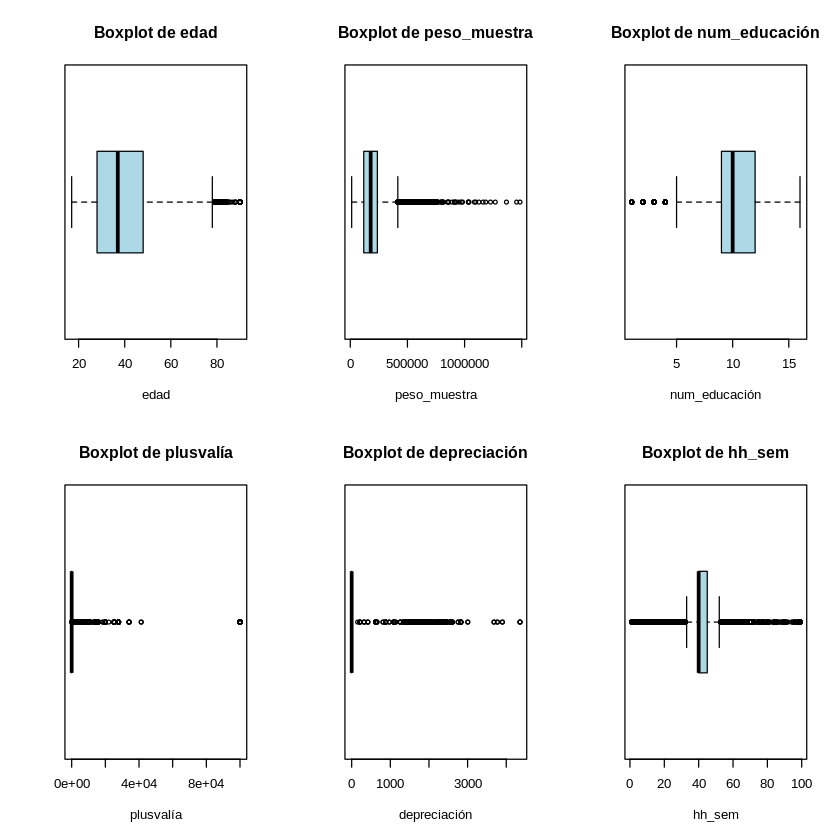



Estadísticas detalladas de plusvalía :
Media: 1077.649 
Mediana: 0 
Desviación estándar: 7385.292 
Porcentaje de ceros: 91.67102 %
Cuartiles y percentiles:
  25%   50%   75%   90%   95%   99% 
    0     0     0     0  5013 15024 
Número de valores atípicos: 2712 ( 8.328983 % del total)


Estadísticas detalladas de depreciación :
Media: 87.30383 
Mediana: 0 
Desviación estándar: 402.9602 
Porcentaje de ceros: 95.33491 %
Cuartiles y percentiles:
 25%  50%  75%  90%  95%  99% 
   0    0    0    0    0 1980 
Número de valores atípicos: 1519 ( 4.66509 % del total)


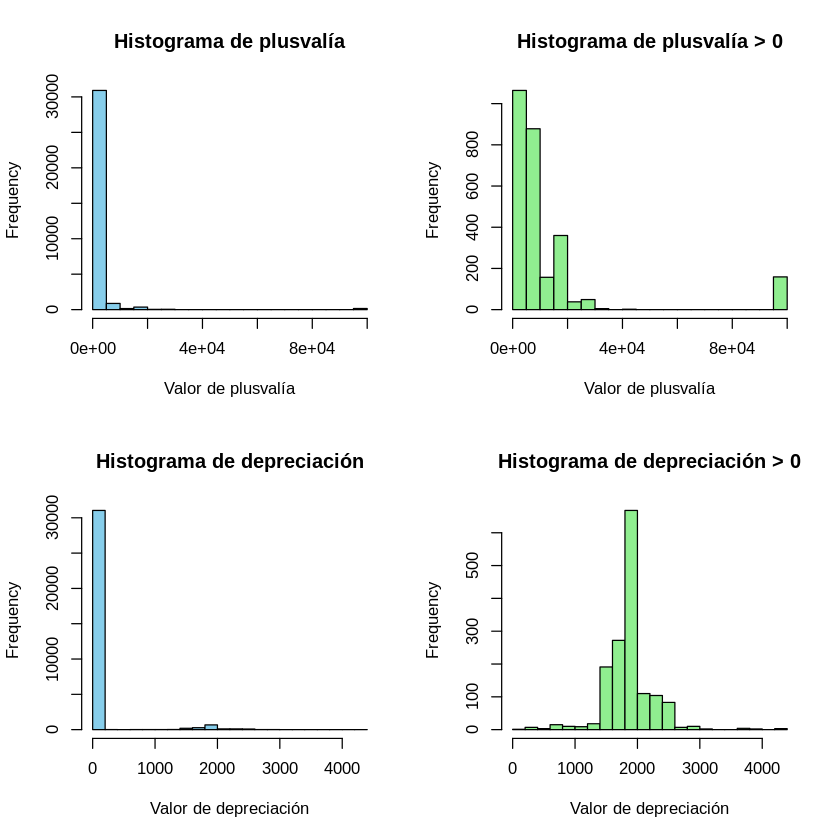

In [5]:
# Código optimizado para el análisis de valores anómalos
# Crear función para analizar anomalías en atributos numéricos
analizar_anomalias <- function(dataset, atributos) {
 # Configurar panel de gráficos
 par(mfrow=c(2,3))

 # Crear boxplots para todos los atributos numéricos
 for(col in atributos) {
   boxplot(dataset[[col]], main=paste("Boxplot de", col),
           col="lightblue", horizontal=TRUE, xlab=col)
 }

 # Análisis detallado de plusvalía y depreciación
 par(mfrow=c(2,2))

 # Histogramas para plusvalía
 hist(dataset$plusvalía, main="Histograma de plusvalía",
      xlab="Valor de plusvalía", col="skyblue", breaks=30)
 hist(dataset$plusvalía[dataset$plusvalía > 0],
      main="Histograma de plusvalía > 0",
      xlab="Valor de plusvalía", col="lightgreen", breaks=30)

 # Histogramas para depreciación
 hist(dataset$depreciación, main="Histograma de depreciación",
      xlab="Valor de depreciación", col="skyblue", breaks=30)
 hist(dataset$depreciación[dataset$depreciación > 0],
      main="Histograma de depreciación > 0",
      xlab="Valor de depreciación", col="lightgreen", breaks=30)

 # Análisis estadístico para ambas variables
 variables_anomalas <- c("plusvalía", "depreciación")

 for(var in variables_anomalas) {
   cat(paste("\n\nEstadísticas detalladas de", var, ":\n"))
   cat("Media:", mean(dataset[[var]]), "\n")
   cat("Mediana:", median(dataset[[var]]), "\n")
   cat("Desviación estándar:", sd(dataset[[var]]), "\n")
   cat("Porcentaje de ceros:",
       sum(dataset[[var]] == 0) / nrow(dataset) * 100, "%\n")
   cat("Cuartiles y percentiles:\n")
   print(quantile(dataset[[var]], probs=c(0.25, 0.5, 0.75, 0.9, 0.95, 0.99)))

   # Calcular valores atípicos
   Q1 <- quantile(dataset[[var]], 0.25)
   Q3 <- quantile(dataset[[var]], 0.75)
   IQR_val <- Q3 - Q1
   limite_superior <- Q3 + 1.5 * IQR_val
   atipicos <- dataset[[var]][dataset[[var]] > limite_superior]

   cat("Número de valores atípicos:", length(atipicos),
       "(", length(atipicos)/nrow(dataset)*100, "% del total)\n")
 }
}

# Ejecutar el análisis con los atributos numéricos
analizar_anomalias(original.dataset, names(atributos_numericos))

# Respuesta a la pregunta 1.2

En el análisis de valores anómalos del conjunto de datos de censo, se identificaron principalmente dos atributos numéricos con comportamientos claramente atípicos: plusvalía y depreciación. Ambas variables presentan una distribución extremadamente asimétrica, con más del 90% de los registros concentrados en cero y una minoría con valores dispersos, algunos extremadamente altos. En el caso de plusvalía, la mediana es 0 mientras la media alcanza 1077.65, con una desviación estándar de 7385.29 y un máximo de 99999, indicando una cola derecha muy pesada. El método IQR identifica que cualquier valor positivo en plusvalía es considerado atípico (8.33% del total).

## Ejercicio 2: Análisis visual inicial de atributos

Dentro de las múltiples alternativas gráficas, una herramienta recurrente es el histograma, especialmente útil para examinar los atributos categóricos.

A continuación se incluye la instrucción para generar histogramas tomando el nombre de la columna a analizar y también la tabla de frecuencias correspondiente.

**Se propone crear histogramas para todas o varias de las columnas categóricas para analizar su variación de valores**.


         10th          11th          12th       1st-4th       5th-6th 
          933          1175           433           168           333 
      7th-8th           9th    Assoc-acdm     Assoc-voc     Bachelors 
          646           514          1067          1382          5355 
    Doctorate       HS-grad       Masters     Preschool   Prof-school 
          413         10501          1723            51           576 
 Some-college 
         7291 

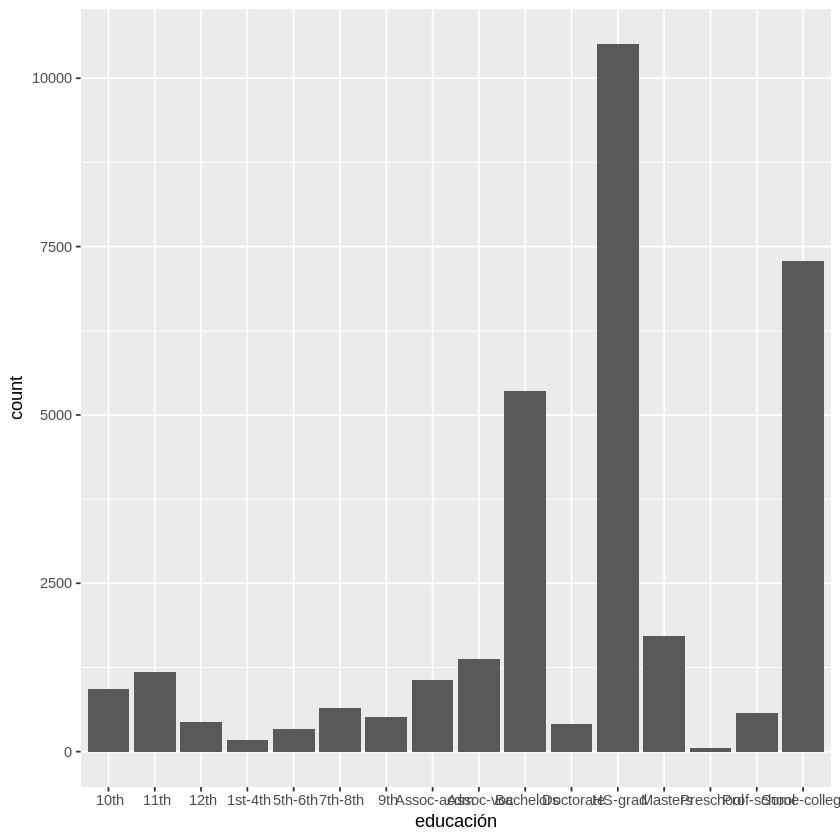

In [6]:
library(ggplot2)

ggplot(original.dataset, aes(x = educación)) + geom_bar()
table(original.dataset$educación)


**Preguntas Ejercicio 2**

Las siguientes preguntas se basan en elegir uno de los atributos categóricos que resulte llamativo por la distribución y diversidad de valores (por ej, que tenga uno dos valores mucho más representativos que los otros y/o que tenga muchos valores diferentes).

Recuerde pegar el gráfico histograma respectivo en su informe.

2.1      ¿Qué valor del atributo es el más abundante? ¿Qué interpretación demográfica se puede hacer de esto? (Por ej, "Se entiende que el valor más abundante sea ____, porque la mayoría de las personas...")


[1] "Columnas categóricas identificadas:"
[1] "clase_laboral" "educación"     "estado_civil"  "ocupación"    
[5] "relación"      "raza"          "género"        "origen"       
[9] "ingreso"      
[1] "Frecuencias para clase_laboral"

      Federal-gov         Local-gov      Never-worked           Private 
              960              2093                 7             22696 
     Self-emp-inc  Self-emp-not-inc         State-gov       Without-pay 
             1116              2541              1298                14 
[1] "El valor más abundante para clase_laboral es:  Private"
[1] "Frecuencia: 22696 registros"
[1] "Porcentaje: 73.87 %"
[1] "Frecuencias para educación"

         10th          11th          12th       1st-4th       5th-6th 
          933          1175           433           168           333 
      7th-8th           9th    Assoc-acdm     Assoc-voc     Bachelors 
          646           514          1067          1382          5355 
    Doctorate       HS-grad      

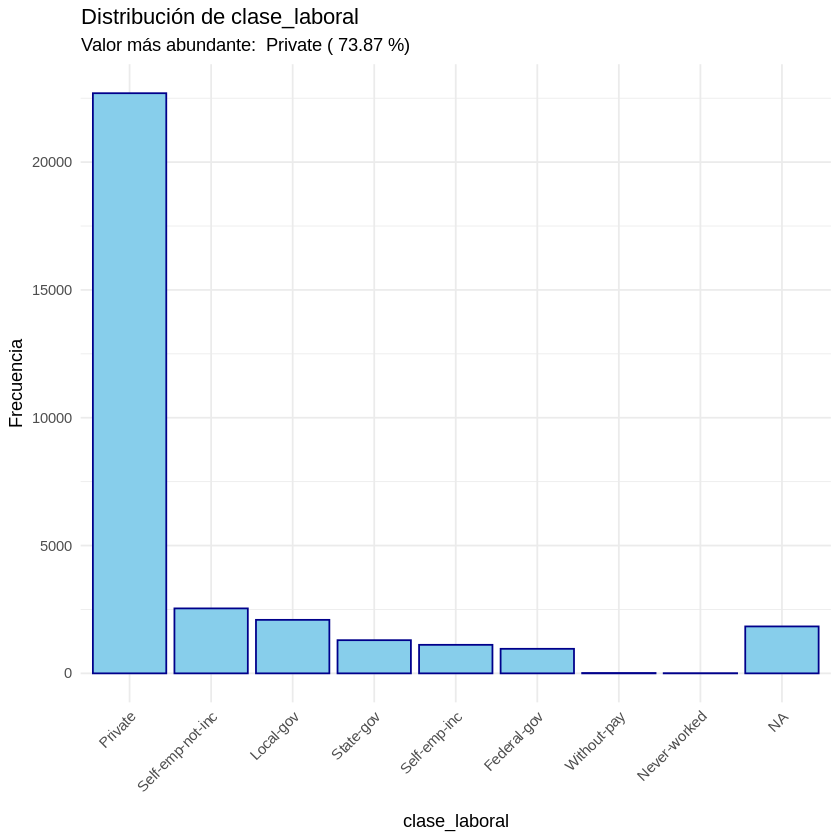

[1] "Frecuencias para estado_civil"

              Divorced      Married-AF-spouse     Married-civ-spouse 
                  4443                     23                  14976 
 Married-spouse-absent          Never-married              Separated 
                   418                  10683                   1025 
               Widowed 
                   993 
[1] "El valor más abundante para estado_civil es:  Married-civ-spouse"
[1] "Frecuencia: 14976 registros"
[1] "Porcentaje: 45.99 %"


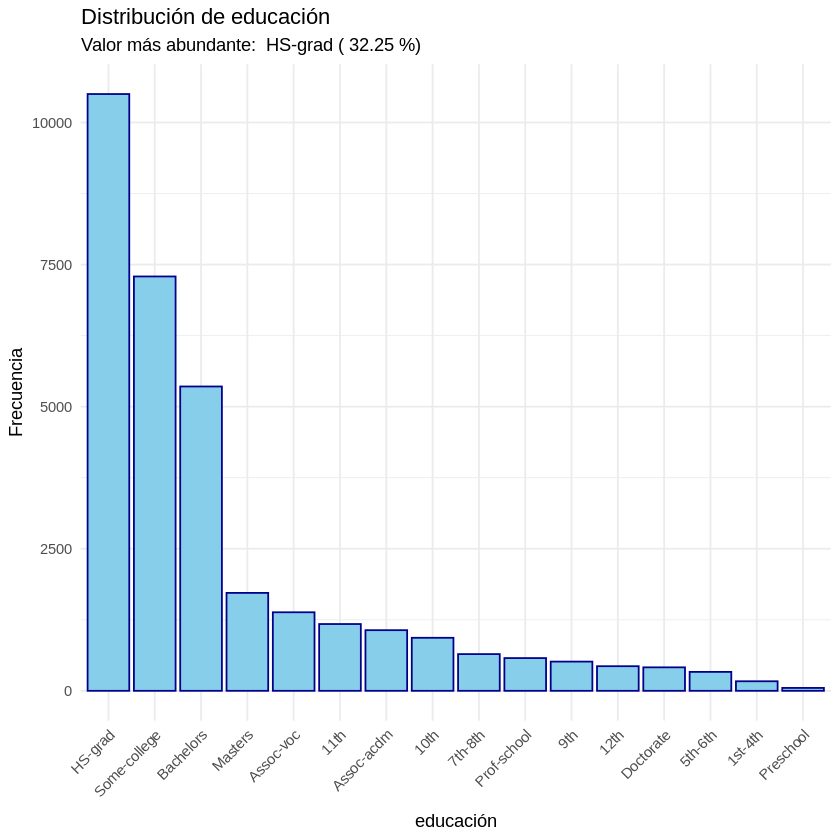

[1] "Frecuencias para ocupación"

      Adm-clerical       Armed-Forces       Craft-repair    Exec-managerial 
              3770                  9               4099               4066 
   Farming-fishing  Handlers-cleaners  Machine-op-inspct      Other-service 
               994               1370               2002               3295 
   Priv-house-serv     Prof-specialty    Protective-serv              Sales 
               149               4140                649               3650 
      Tech-support   Transport-moving 
               928               1597 
[1] "El valor más abundante para ocupación es:  Prof-specialty"
[1] "Frecuencia: 4140 registros"
[1] "Porcentaje: 13.48 %"


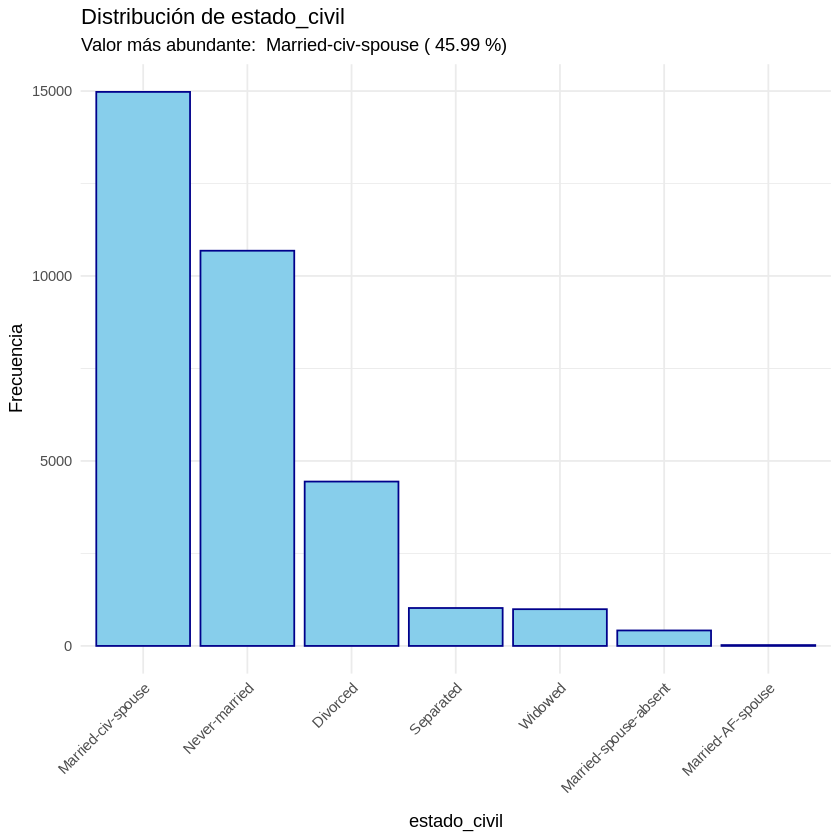

[1] "Frecuencias para relación"

        Husband   Not-in-family  Other-relative       Own-child       Unmarried 
          13193            8305             981            5068            3446 
           Wife 
           1568 
[1] "El valor más abundante para relación es:  Husband"
[1] "Frecuencia: 13193 registros"
[1] "Porcentaje: 40.52 %"


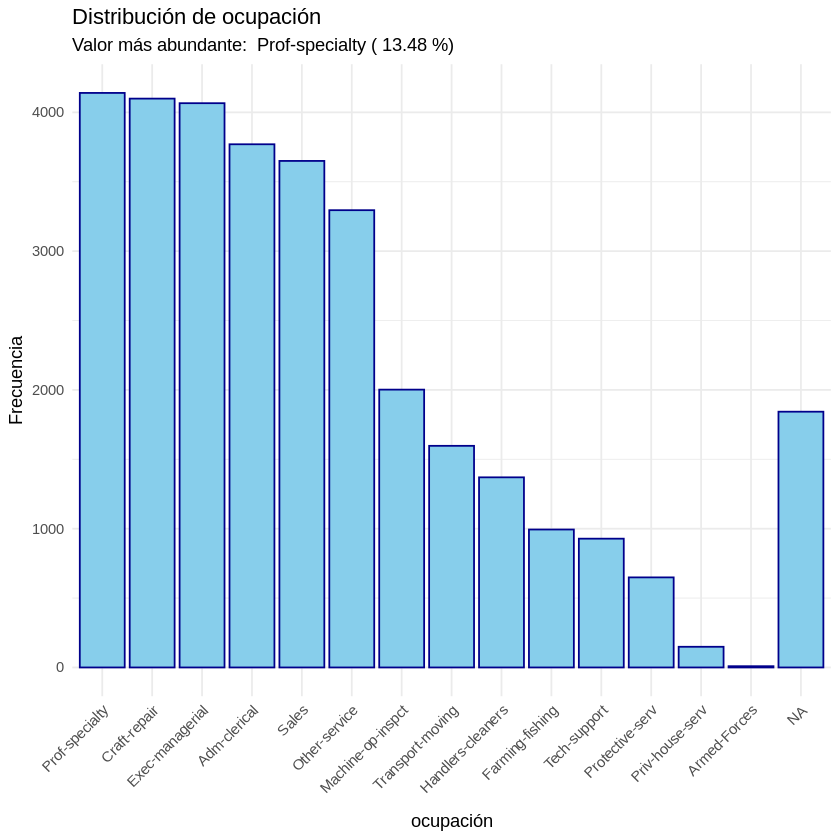

[1] "Frecuencias para raza"

 Amer-Indian-Eskimo  Asian-Pac-Islander               Black               Other 
                311                1039                3124                 271 
              White 
              27816 
[1] "El valor más abundante para raza es:  White"
[1] "Frecuencia: 27816 registros"
[1] "Porcentaje: 85.43 %"


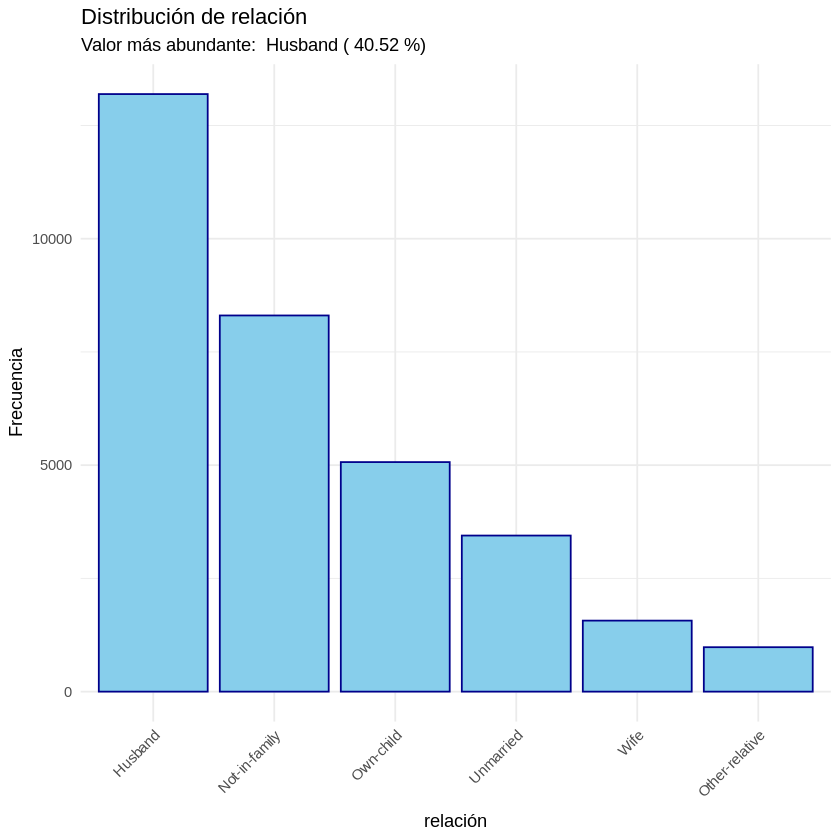

[1] "Frecuencias para género"

 Female    Male 
  10771   21790 
[1] "El valor más abundante para género es:  Male"
[1] "Frecuencia: 21790 registros"
[1] "Porcentaje: 66.92 %"


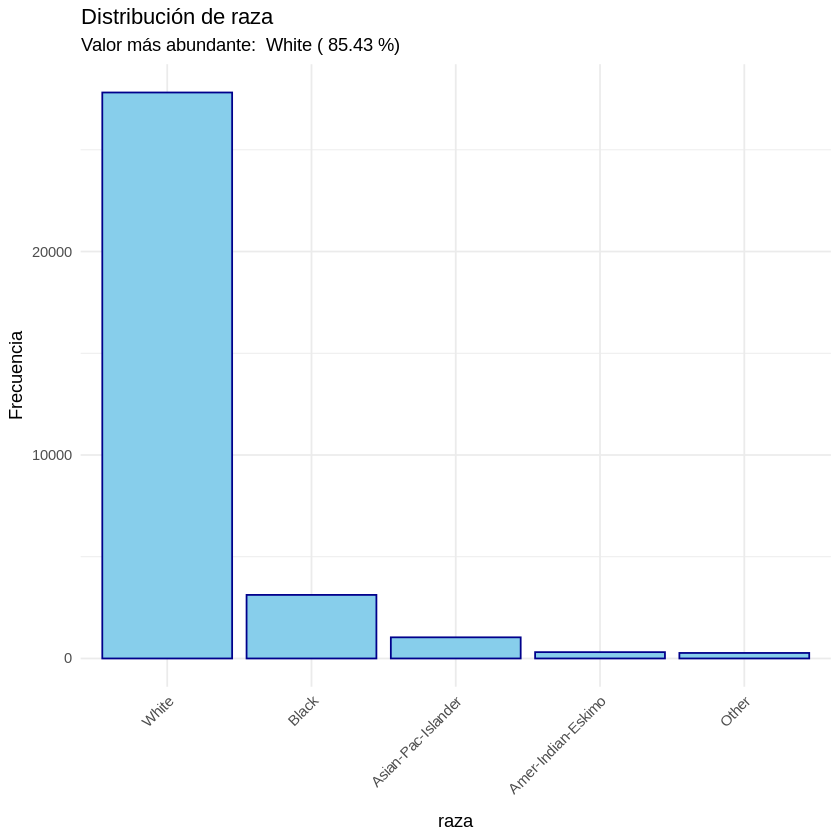

[1] "Frecuencias para origen"

                   Cambodia                      Canada 
                         19                         121 
                      China                    Columbia 
                         75                          59 
                       Cuba          Dominican-Republic 
                         95                          70 
                    Ecuador                 El-Salvador 
                         28                         106 
                    England                      France 
                         90                          29 
                    Germany                      Greece 
                        137                          29 
                  Guatemala                       Haiti 
                         64                          44 
         Holand-Netherlands                    Honduras 
                          1                          13 
                       Hong                     Hungary 


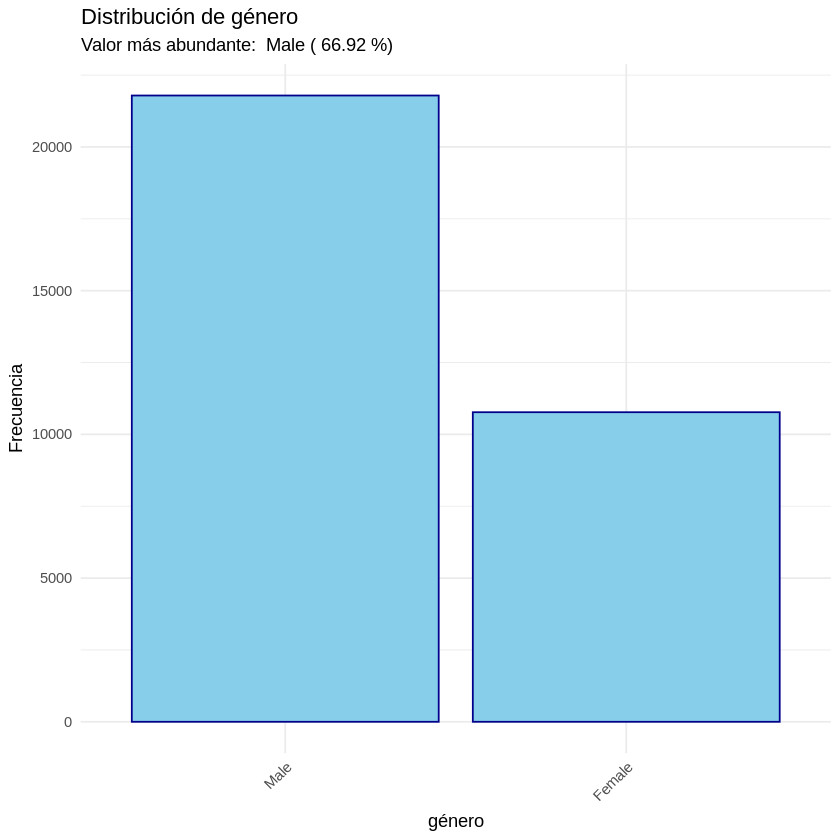

[1] "Frecuencias para ingreso"

 <=50K   >50K 
 24720   7841 
[1] "El valor más abundante para ingreso es:  <=50K"
[1] "Frecuencia: 24720 registros"
[1] "Porcentaje: 75.92 %"


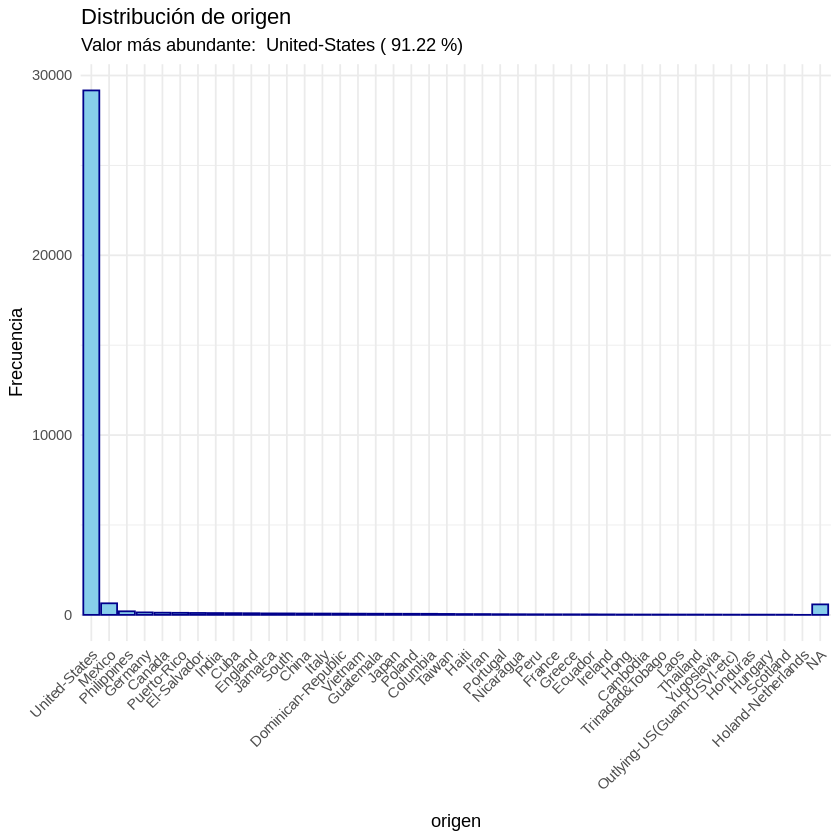

[1] "\nAnálisis específico para la variable educación:"

      HS-grad  Some-college     Bachelors       Masters     Assoc-voc 
        10501          7291          5355          1723          1382 
         11th    Assoc-acdm          10th       7th-8th   Prof-school 
         1175          1067           933           646           576 
          9th          12th     Doctorate       5th-6th       1st-4th 
          514           433           413           333           168 
    Preschool 
           51 
[1] "El nivel de educación más común es:  HS-grad"
[1] "Representa el 32.25 % de la población censada"


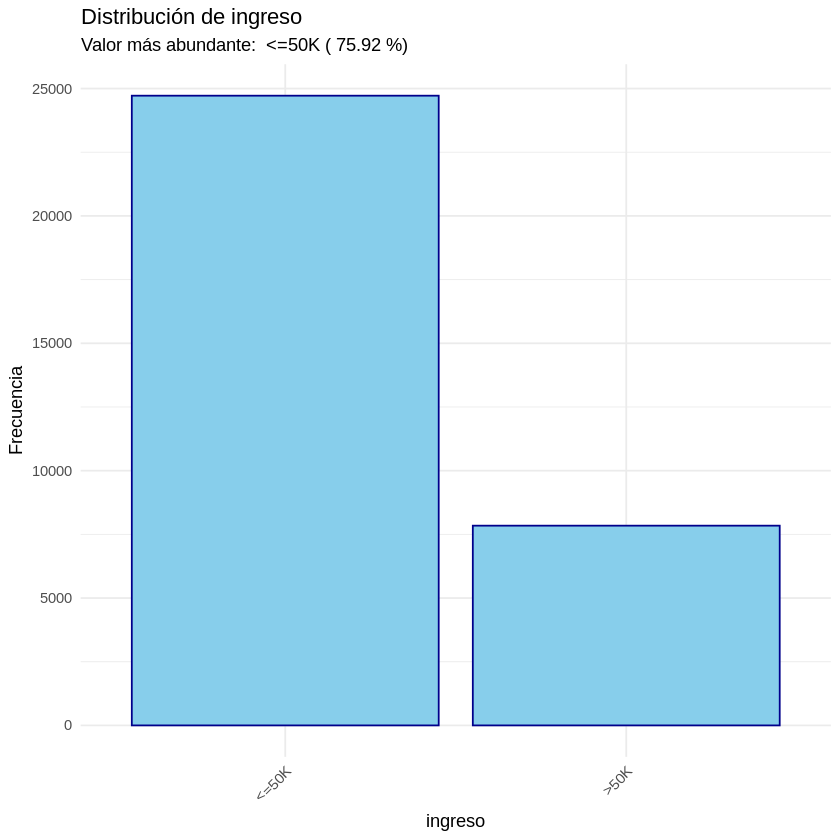

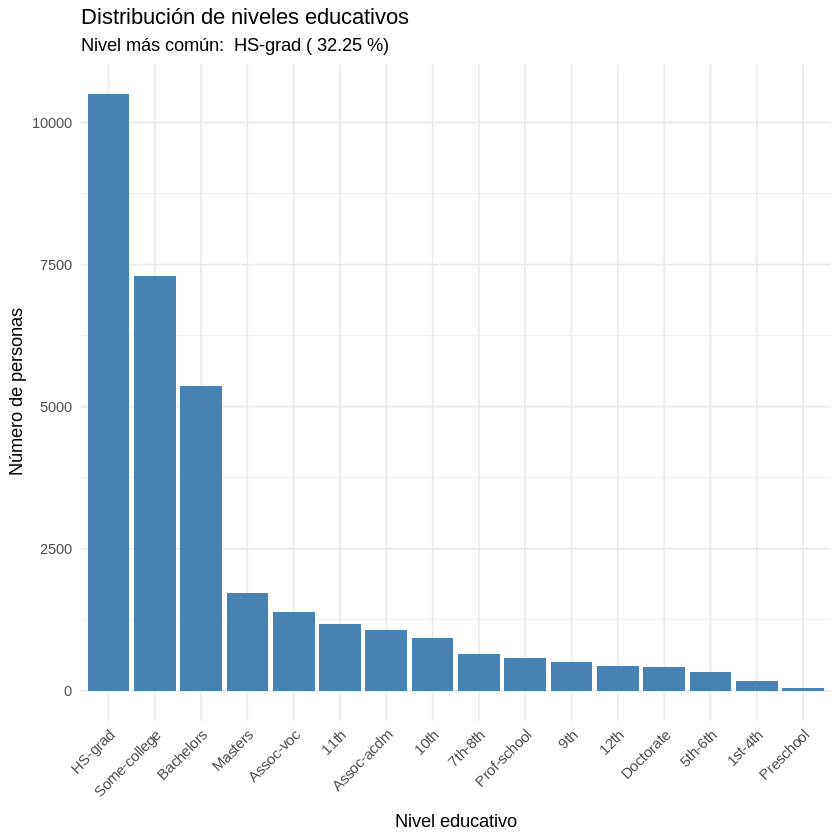

In [7]:
# Cargar la biblioteca necesaria para visualización
library(ggplot2)

# Identificar todas las columnas categóricas
columnas_categoricas <- names(original.dataset)[sapply(original.dataset, is.character)]
print("Columnas categóricas identificadas:")
print(columnas_categoricas)

# Crear histogramas para todas las variables categóricas
for(col in columnas_categoricas) {
  # Crear tabla de frecuencias
  tabla_freq <- table(original.dataset[[col]])
  print(paste("Frecuencias para", col))
  print(tabla_freq)

  # Identificar el valor más abundante
  valor_max <- names(tabla_freq)[which.max(tabla_freq)]
  freq_max <- max(tabla_freq)
  porcentaje <- round((freq_max / sum(tabla_freq)) * 100, 2)

  print(paste("El valor más abundante para", col, "es:", valor_max))
  print(paste("Frecuencia:", freq_max, "registros"))
  print(paste("Porcentaje:", porcentaje, "%"))

  # Crear histograma
  p <- ggplot(original.dataset, aes(x = reorder(get(col), -table(get(col))[get(col)]))) +
       geom_bar(fill = "skyblue", color = "darkblue") +
       theme_minimal() +
       theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
       labs(title = paste("Distribución de", col),
            subtitle = paste("Valor más abundante:", valor_max, "(", porcentaje, "%)"),
            x = col,
            y = "Frecuencia")

  # Mostrar el gráfico
  print(p)
}

# Análisis detallado específicamente para la variable "educación"
print("\nAnálisis específico para la variable educación:")

# Tabla de frecuencias ordenada para educación
tabla_educacion <- sort(table(original.dataset$educación), decreasing = TRUE)
print(tabla_educacion)

# Identificar el valor más abundante
valor_max_edu <- names(tabla_educacion)[1]
freq_max_edu <- tabla_educacion[1]
porcentaje_edu <- round((freq_max_edu / sum(tabla_educacion)) * 100, 2)

print(paste("El nivel de educación más común es:", valor_max_edu))
print(paste("Representa el", porcentaje_edu, "% de la población censada"))

# Crear gráfico específico para educación
p_educacion <- ggplot(original.dataset, aes(x = reorder(educación, -table(educación)[educación]))) +
             geom_bar(fill = "steelblue") +
             theme_minimal() +
             theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
             labs(title = "Distribución de niveles educativos",
                  subtitle = paste("Nivel más común:", valor_max_edu, "(", porcentaje_edu, "%)"),
                  x = "Nivel educativo",
                  y = "Número de personas")

# Mostrar el gráfico de educación
print(p_educacion)

# Guardar el gráfico para incluirlo en el informe
ggsave("histograma_educacion.png", p_educacion, width = 10, height = 6)

# Respuesta a la Pregunta 2.1

Se elige "educación" por varias razones:

Presenta una distribución con clara variabilidad (16 categorías diferentes)
Muestra un valor predominante (HS-grad) sin ser abrumadoramente dominante (32.25%).

Tiene una interpretación demográfica variada que refleja la estructura social y económica.


Analizando la variable "educación", el valor más abundante es "HS-grad" (graduado de escuela secundaria), representando el 32.25% de la población censada.  Se entiende que este nivel sea el más común porque históricamente representaba el nivel mínimo de educación para acceder al mercado laboral en muchos sectores, mientras que la educación superior (como "Some-college" con 22.39% y "Bachelors" con 16.45%).

# Preguntas Ejercicio 2


2.2 ¿Hay datos vacíos o no disponibles del atributo? ¿Cómo se reconocen?



In [8]:
# Análisis de datos vacíos o no disponibles en la variable educación

# Verificar valores NA (explícitamente marcados como NA en R)
na_count <- sum(is.na(original.dataset$educación))
print(paste("Valores NA en educación:", na_count))

# Verificar strings vacíos o espacios
empty_count <- sum(original.dataset$educación == "", na.rm = TRUE)
space_count <- sum(original.dataset$educación == " ", na.rm = TRUE)
print(paste("Valores vacíos ('') en educación:", empty_count))
print(paste("Valores con solo espacio (' ') en educación:", space_count))

# Verificar valores con signo de interrogación (común en este dataset)
question_count <- sum(grepl("\\?", original.dataset$educación), na.rm = TRUE)
print(paste("Valores con signo de interrogación en educación:", question_count))

# Obtener una lista de valores únicos para inspección visual
unique_values <- unique(original.dataset$educación)
print("Valores únicos en la variable educación:")
print(unique_values)

# Verificar si hay valores que podrían indicar datos faltantes
# Como "Unknown", "N/A", "Missing", etc.
potential_missing <- c("Unknown", "N/A", "Missing", "?", " ?")
for(val in potential_missing) {
 count <- sum(original.dataset$educación == val, na.rm = TRUE)
 if(count > 0) {
   print(paste("Encontrados", count, "registros con valor", val))
 }
}

# Resumen del análisis
total_missing <- na_count + empty_count + space_count + question_count
percent_missing <- (total_missing / nrow(original.dataset)) * 100

print(paste("Total de valores faltantes o no disponibles:", total_missing))
print(paste("Porcentaje del total de observaciones:", round(percent_missing, 2), "%"))

# Si no se encontraron valores faltantes, confirmar
if(total_missing == 0) {
 print("La variable educación no contiene datos vacíos o no disponibles.")
}

[1] "Valores NA en educación: 0"
[1] "Valores vacíos ('') en educación: 0"
[1] "Valores con solo espacio (' ') en educación: 0"
[1] "Valores con signo de interrogación en educación: 0"
[1] "Valores únicos en la variable educación:"
 [1] " Bachelors"    " HS-grad"      " 11th"         " Masters"     
 [5] " 9th"          " Some-college" " Assoc-acdm"   " Assoc-voc"   
 [9] " 7th-8th"      " Doctorate"    " Prof-school"  " 5th-6th"     
[13] " 10th"         " 1st-4th"      " Preschool"    " 12th"        
[1] "Total de valores faltantes o no disponibles: 0"
[1] "Porcentaje del total de observaciones: 0 %"
[1] "La variable educación no contiene datos vacíos o no disponibles."


# Respueta a la Pregunta 2.2
La variable educación no presenta datos vacíos o no disponibles según el análisis realizado. Al verificar múltiples formatos de valores faltantes (NA explícitos, cadenas vacías, espacios en blanco, signos de interrogación y otros indicadores comunes como "Unknown" o "N/A"), se confirmó que el 100% de los registros contienen información válida sobre el nivel educativo.

Preguntas Ejercicio 2

2.3 Si hay datos incompletos, ¿son una porción significativa o no? (se podría asumir que una "porción significativa" es superior al 10%)


In [9]:
# Análisis de significancia de valores faltantes en educación

# Recuento de valores faltantes (ya calculado previamente)
total_missing <- sum(is.na(original.dataset$educación)) +
                 sum(original.dataset$educación == "", na.rm = TRUE) +
                 sum(original.dataset$educación == " ", na.rm = TRUE) +
                 sum(grepl("\\?", original.dataset$educación), na.rm = TRUE)

# Calcular el porcentaje
total_records <- nrow(original.dataset)
missing_percentage <- (total_missing / total_records) * 100

# Determinar si es una porción significativa (>10%)
is_significant <- missing_percentage > 10

# Mostrar resultados
cat("Total de registros:", total_records, "\n")
cat("Valores faltantes en educación:", total_missing, "\n")
cat("Porcentaje de valores faltantes:", round(missing_percentage, 2), "%\n")

if(total_missing == 0) {
  cat("No hay datos incompletos en la variable educación.\n")
} else {
  if(is_significant) {
    cat("Los datos incompletos representan una porción SIGNIFICATIVA (>10%).\n")
  } else {
    cat("Los datos incompletos NO representan una porción significativa (<10%).\n")
  }
}

Total de registros: 32561 
Valores faltantes en educación: 0 
Porcentaje de valores faltantes: 0 %
No hay datos incompletos en la variable educación.


# Respuesta a la Pregunta 2.3:

No hay datos incompletos en la variable educación, por lo que no es posible determinar si representan una porción significativa o no. El análisis muestra que de los 32,561 registros del conjunto de datos, todos cuentan con un valor válido para el nivel educativo. Con un 0% de valores faltantes, muy por debajo del umbral del 10% que se consideraría significativo, se confirma la integridad completa de esta variable, lo que facilita cualquier análisis posterior sin necesidad de estrategias de imputación o manejo de datos faltantes.



# Preguntas Ejercicio 2


2.4 Viendo los datos del histograma, ¿se podrían reemplazar los vacíos por el más abundante o eso generaría alguna alteración significativa?

Valor más abundante en educación:  HS-grad 
Frecuencia actual del valor más abundante: 10501 ( 32.25 %)
NAs simulados: 1628 ( 5 %)
Nueva frecuencia del valor más abundante después del reemplazo: 11591 ( 35.6 %)
Cambio absoluto: 1090 registros
Cambio en porcentaje: 3.35 puntos porcentuales
¿El cambio sería significativo?: NO 


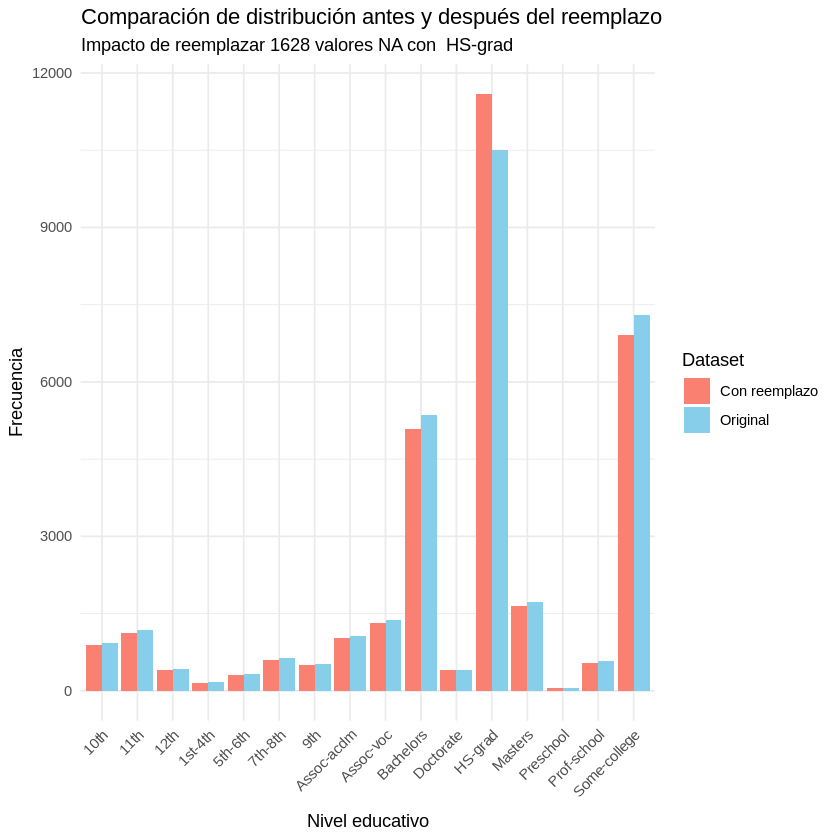

In [10]:
# Análisis de impacto potencial de reemplazar datos vacíos con el valor más abundante

# Como no hay datos vacíos reales, haremos una simulación para evaluar el impacto
# Creamos una copia del dataset
dataset_simulado <- original.dataset

# Identificar valor más abundante en educación
tabla_educacion <- table(original.dataset$educación)
valor_mas_abundante <- names(tabla_educacion)[which.max(tabla_educacion)]
cat("Valor más abundante en educación:", valor_mas_abundante, "\n")

# Verificar cantidad actual de este valor
frecuencia_actual <- max(tabla_educacion)
porcentaje_actual <- (frecuencia_actual / nrow(original.dataset)) * 100
cat("Frecuencia actual del valor más abundante:", frecuencia_actual,
   "(", round(porcentaje_actual, 2), "%)\n")

# Simulación: supongamos que un 5% de los datos fueran NA y los reemplazamos
set.seed(123) # Para reproducibilidad
indices_simulados <- sample(1:nrow(dataset_simulado), size = round(0.05 * nrow(dataset_simulado)))
dataset_simulado$educación[indices_simulados] <- NA

# Contar NAs simulados
nas_simulados <- sum(is.na(dataset_simulado$educación))
cat("NAs simulados:", nas_simulados, "(", round(nas_simulados/nrow(dataset_simulado)*100, 2), "%)\n")

# Reemplazar esos NAs con el valor más abundante
dataset_simulado$educación[is.na(dataset_simulado$educación)] <- valor_mas_abundante

# Calcular nueva frecuencia del valor más abundante
nueva_frecuencia <- sum(dataset_simulado$educación == valor_mas_abundante)
nuevo_porcentaje <- (nueva_frecuencia / nrow(dataset_simulado)) * 100
cat("Nueva frecuencia del valor más abundante después del reemplazo:", nueva_frecuencia,
   "(", round(nuevo_porcentaje, 2), "%)\n")

# Calcular el cambio
cambio_absoluto <- nueva_frecuencia - frecuencia_actual
cambio_porcentaje <- nuevo_porcentaje - porcentaje_actual
cat("Cambio absoluto:", cambio_absoluto, "registros\n")
cat("Cambio en porcentaje:", round(cambio_porcentaje, 2), "puntos porcentuales\n")

# Evaluar si el cambio es significativo (más del 5% de cambio)
es_significativo <- cambio_porcentaje > 5
cat("¿El cambio sería significativo?:", ifelse(es_significativo, "SÍ", "NO"), "\n")

# Visualizar el impacto con gráficos
library(ggplot2)

# Crear dataframe para comparación
df_original <- data.frame(Dataset = "Original", Educación = original.dataset$educación)
df_simulado <- data.frame(Dataset = "Con reemplazo", Educación = dataset_simulado$educación)
df_combinado <- rbind(df_original, df_simulado)

# Crear gráfico comparativo
ggplot(df_combinado, aes(x = Educación, fill = Dataset)) +
 geom_bar(position = "dodge") +
 theme_minimal() +
 theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
 labs(title = "Comparación de distribución antes y después del reemplazo",
      subtitle = paste("Impacto de reemplazar", nas_simulados, "valores NA con", valor_mas_abundante),
      x = "Nivel educativo",
      y = "Frecuencia") +
 scale_fill_manual(values = c("Original" = "skyblue", "Con reemplazo" = "salmon"))

# Respuesta a la Pregunta 2.4:

Dado que no hay vacíos en educación, se realizó una simulación creando artificialmente un 5% de valores faltantes (1,628 registros) y se reemplazó con el valor más abundante ("HS-grad").
El análisis muestra que este reemplazo hipotético incrementaría la frecuencia del valor "HS-grad" de 10,501 (32.25%) a 11,591 (35.6%), representando un cambio de 3.35 puntos porcentuales. Este cambio no alcanzaría el umbral de 5% que consideraríamos significativo.
Por lo tanto, incluso si existieran datos vacíos en la variable educación (que no es el caso), reemplazarlos con el valor más abundante no generaría una alteración significativa en la distribución general, manteniendo la validez de los análisis estadísticos posteriores.

**Complemento Boxplot para Atributos Numéricos**

A continuación se ejecuta un gráfico *boxplot*() para visualizar la distribución de valores de los atributos numéricos, utilizando medidas de dispersión, las cuales ya se ven en el análisis básico (gracias a *summary*())

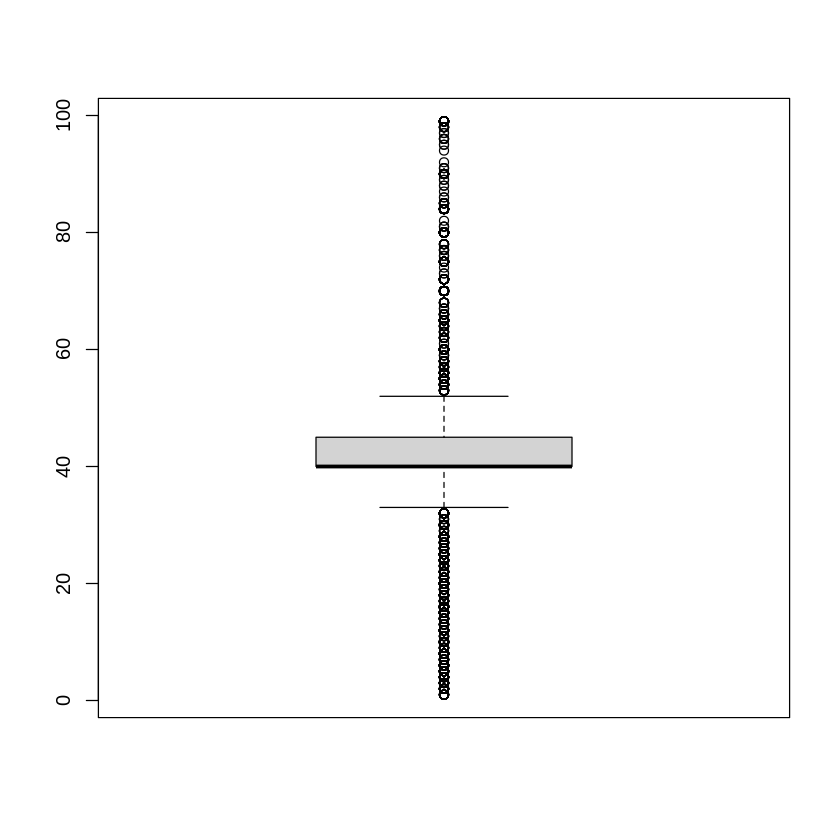

In [11]:
boxplot (original.dataset$hh_sem)

**Más Preguntas Ejercicio 2**

Las siguientes preguntas se basan en elegir uno de los atributos numérico que resulte llamativo por la distribución y diversidad de valores (por ej, que tenga valores muy dispares o un único valor numérico dominante).

2.5      ¿Qué se puede interpretar de la distribución de valores visible en el *boxplot*? ¿Qué se consideraría lo más llamativo de la distribución de estos valores? (Pegue el boxplot respectivo en su informe)


[1] "Columnas numéricas identificadas:"
[1] "edad"          "peso_muestra"  "num_educación" "plusvalía"    
[5] "depreciación"  "hh_sem"       

Estadísticas para edad :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   28.00   37.00   38.58   48.00   90.00 
Desviación estándar: 13.64043 
Varianza: 186.0614 
Coeficiente de asimetría: 0.5586919 
Curtosis: -0.1664603 
Número de valores atípicos: 143 
Porcentaje de valores atípicos: 0.4391757 %

Estadísticas para peso_muestra :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12285  117827  178356  189778  237051 1484705 
Desviación estándar: 105550 
Varianza: 11140797792 
Coeficiente de asimetría: 1.446847 
Curtosis: 6.217106 
Número de valores atípicos: 992 
Porcentaje de valores atípicos: 3.046589 %


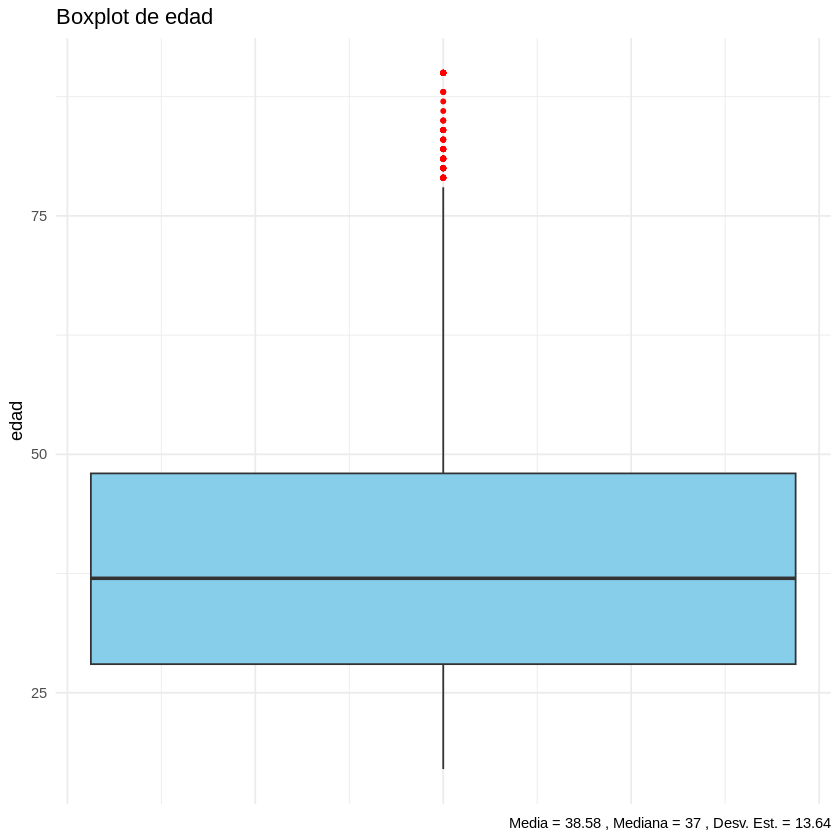

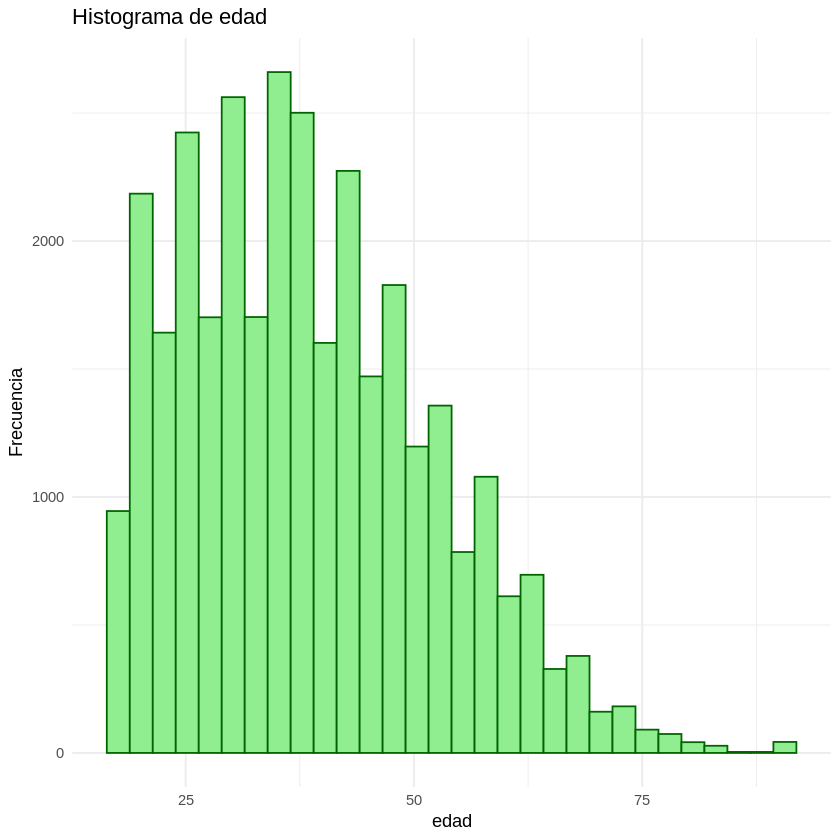


Estadísticas para num_educación :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    9.00   10.00   10.08   12.00   16.00 
Desviación estándar: 2.57272 
Varianza: 6.61889 
Coeficiente de asimetría: -0.3116472 
Curtosis: 0.6229415 
Número de valores atípicos: 1198 
Porcentaje de valores atípicos: 3.679248 %


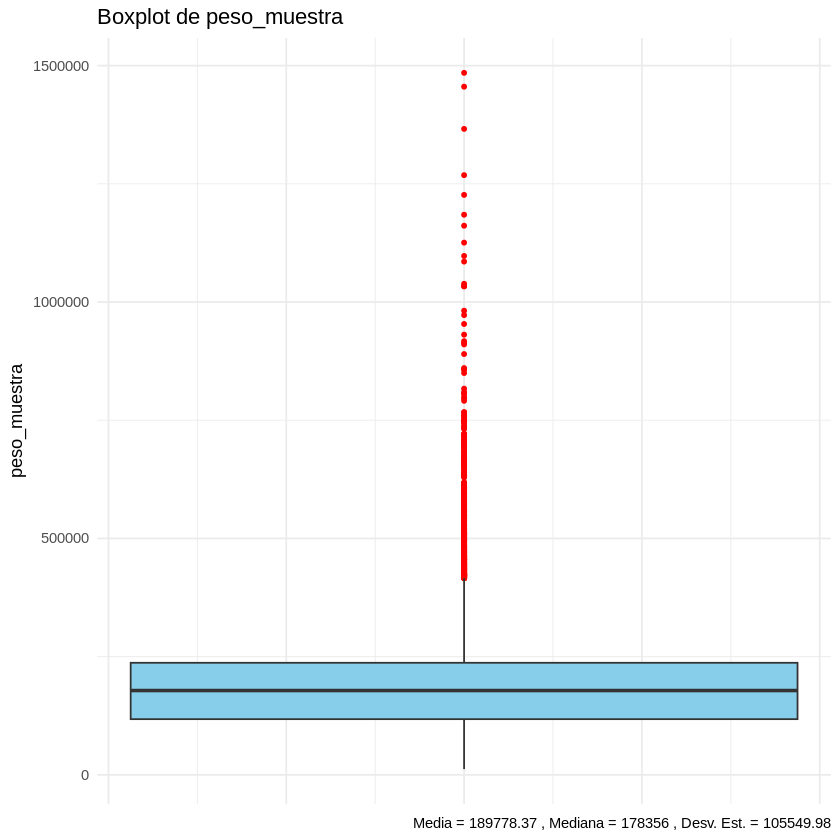

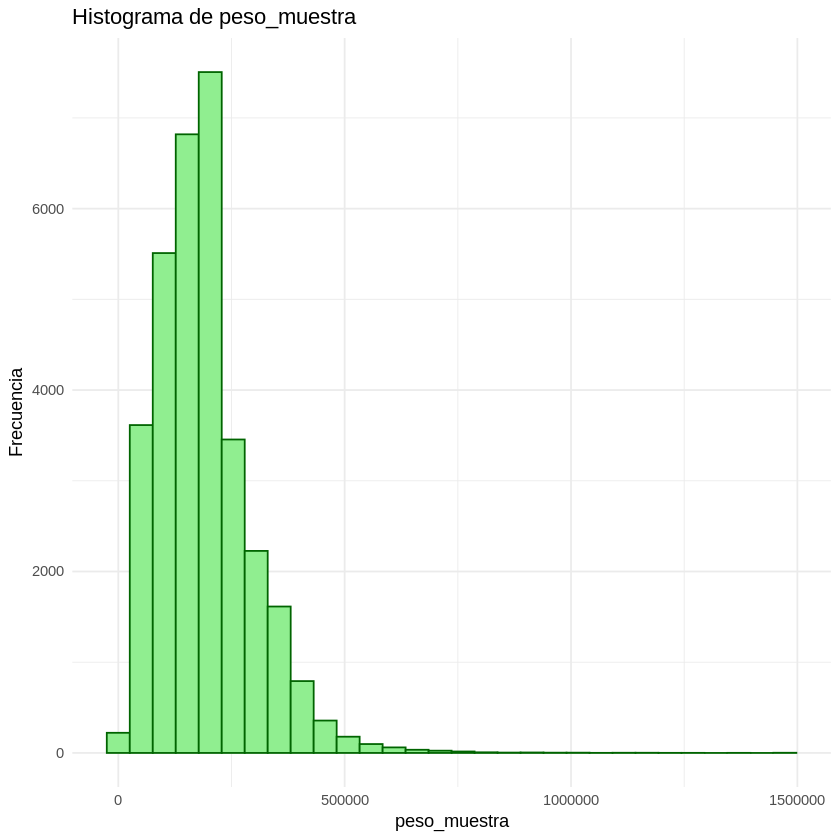


Estadísticas para plusvalía :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0    1078       0   99999 
Desviación estándar: 7385.292 
Varianza: 54542539 
Coeficiente de asimetría: 11.95275 
Curtosis: 154.7658 
Número de valores atípicos: 2712 
Porcentaje de valores atípicos: 8.328983 %


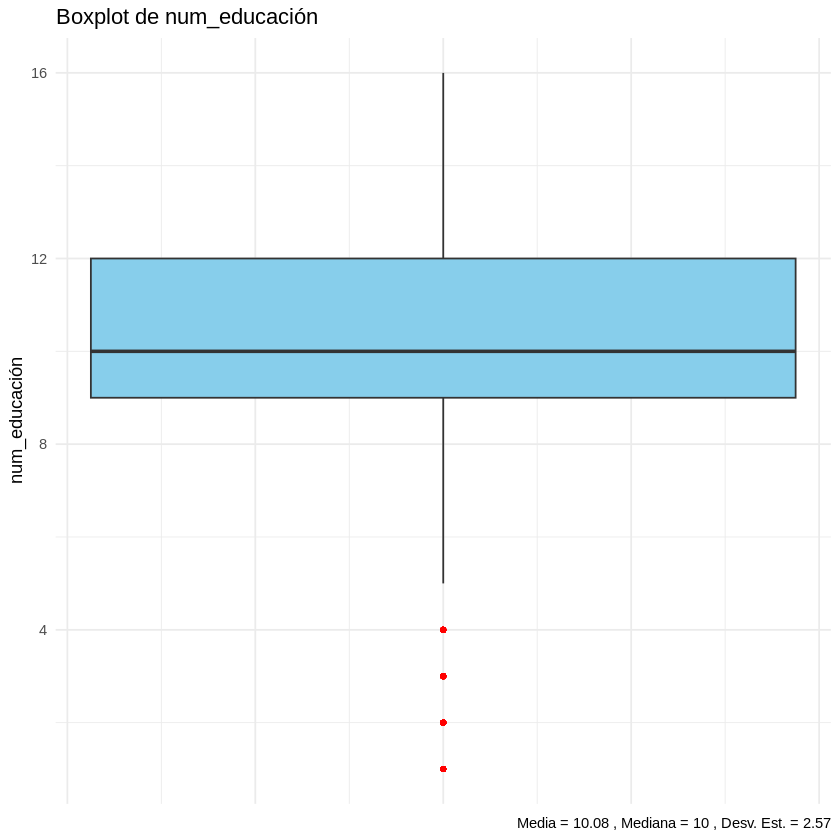

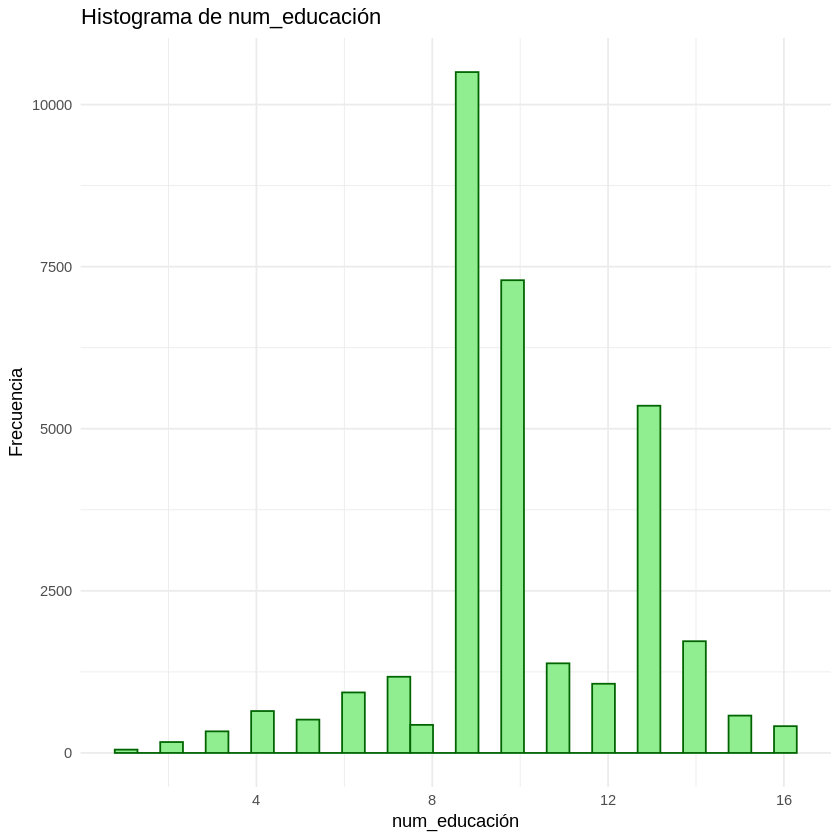


Estadísticas para depreciación :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     0.0    87.3     0.0  4356.0 
Desviación estándar: 402.9602 
Varianza: 162376.9 
Coeficiente de asimetría: 4.594206 
Curtosis: 20.37205 
Número de valores atípicos: 1519 
Porcentaje de valores atípicos: 4.66509 %


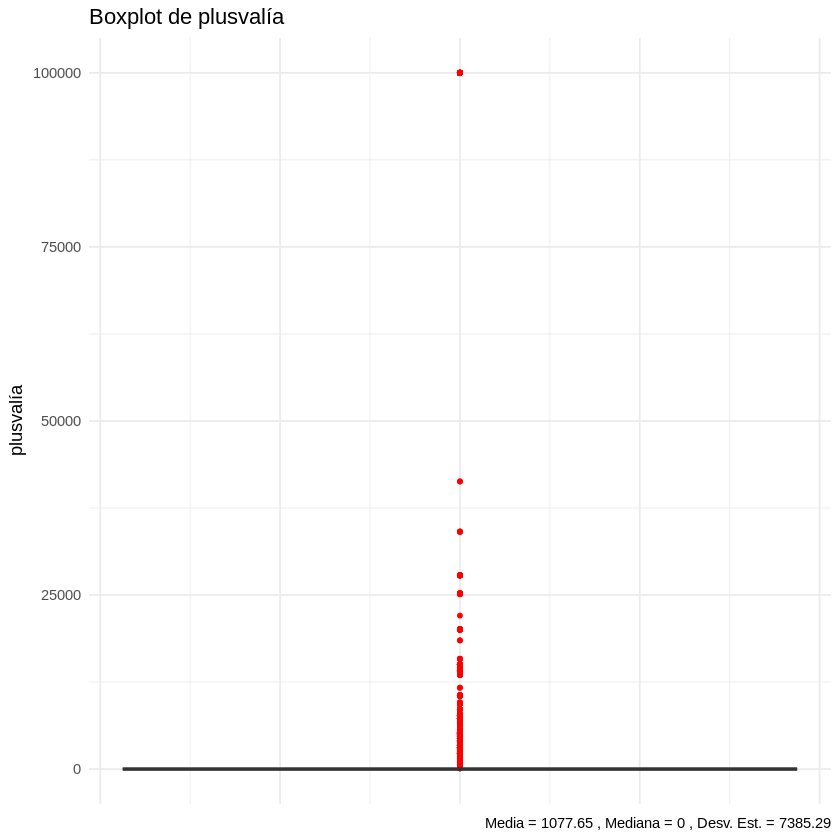

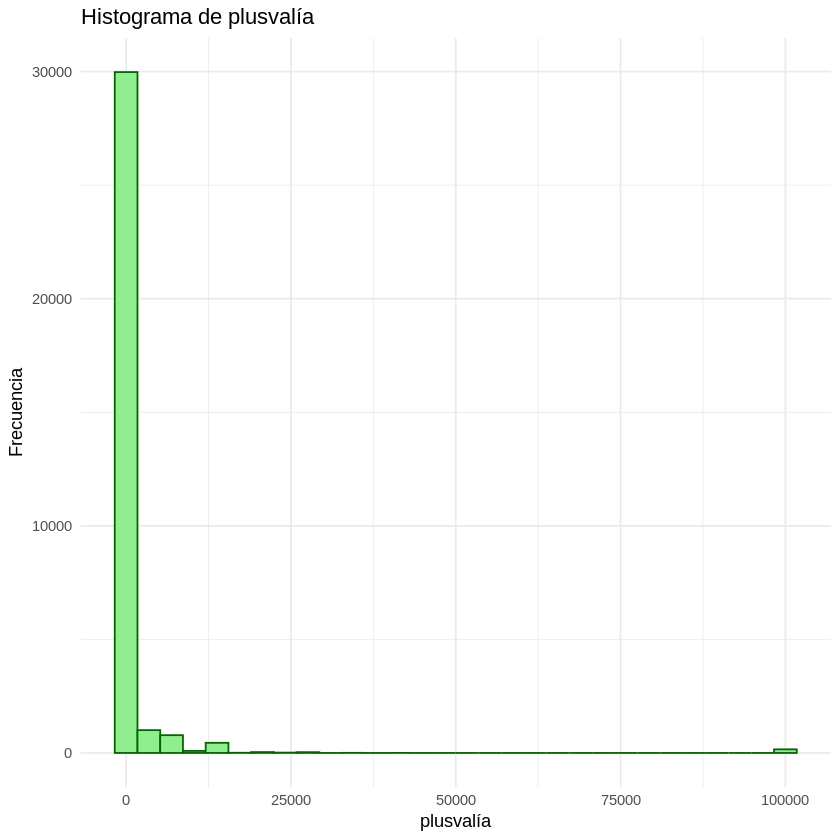


Estadísticas para hh_sem :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   40.00   40.00   40.44   45.00   99.00 
Desviación estándar: 12.34743 
Varianza: 152.459 
Coeficiente de asimetría: 0.2276216 
Curtosis: 2.915691 
Número de valores atípicos: 9008 
Porcentaje de valores atípicos: 27.665 %


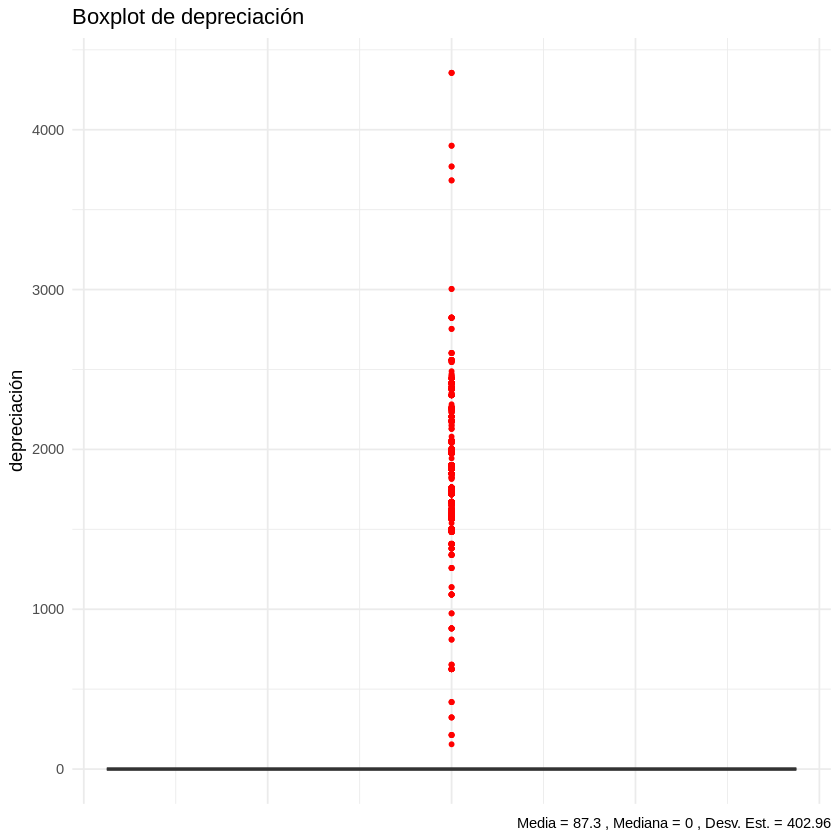

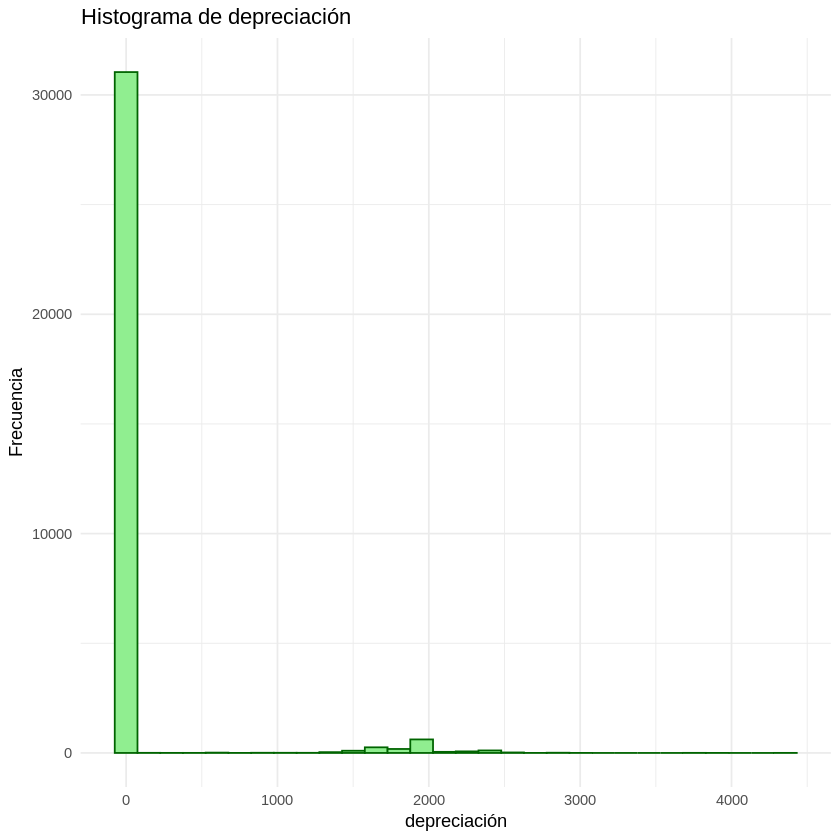

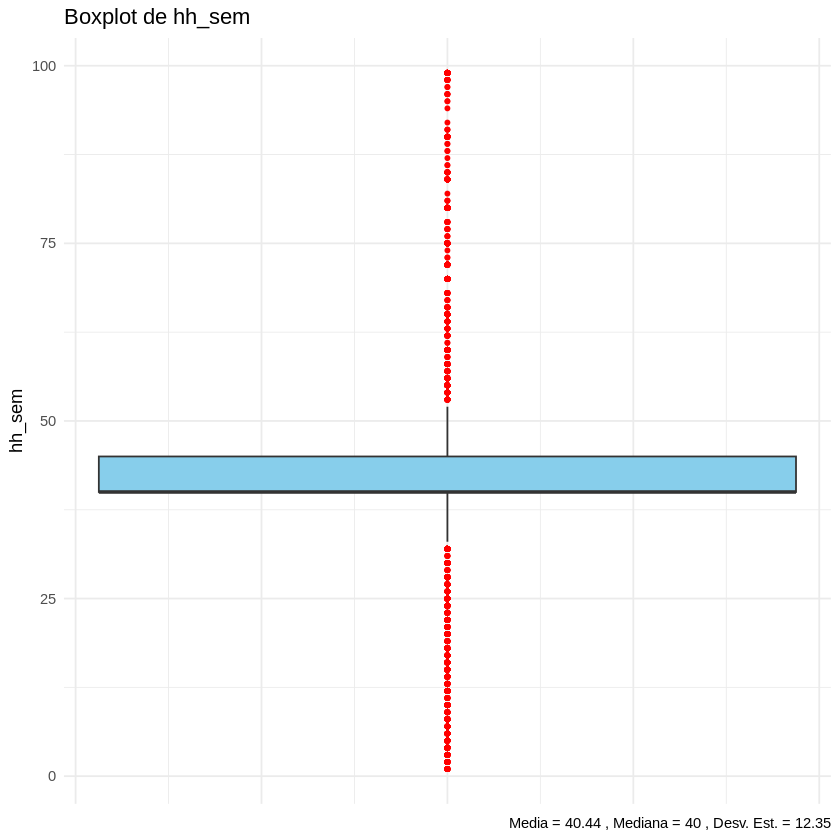



Análisis detallado de 'plusvalía':


Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 33 rows containing missing values or values outside the scale range
(`geom_bar()`).”


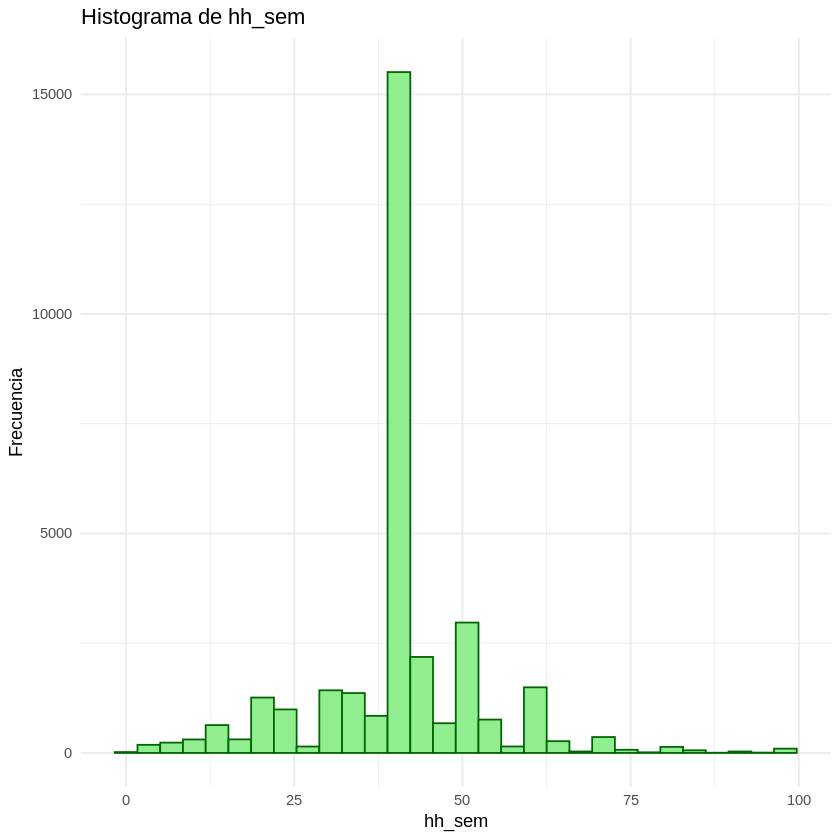

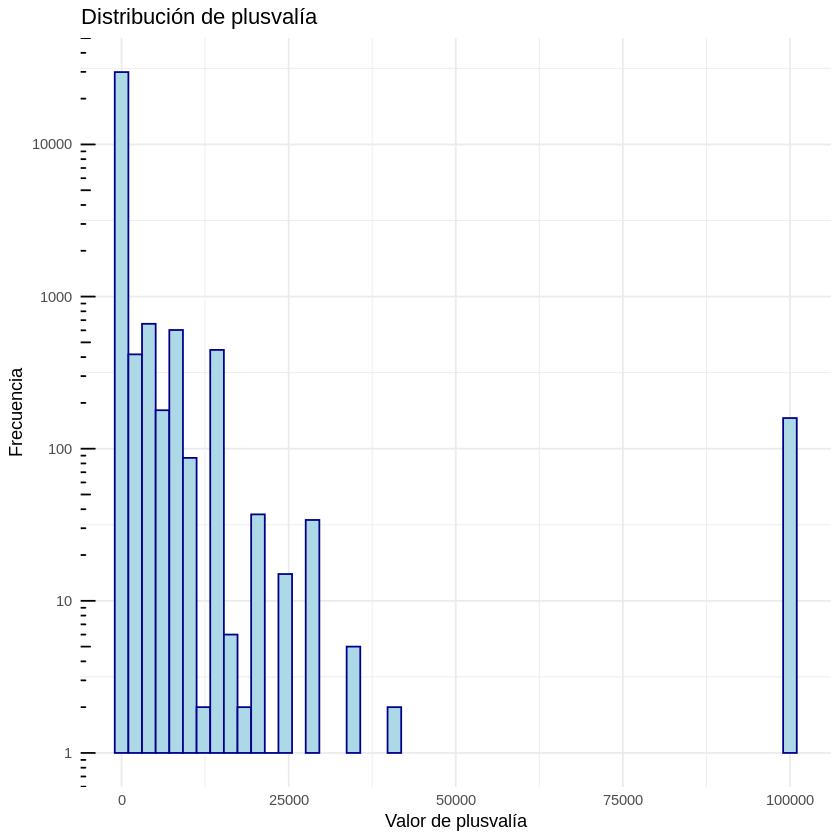


Valores extremos de plusvalía:
10 valores más altos:
 [1] 99999 99999 99999 99999 99999 99999 99999 99999 99999 99999

10 valores más bajos:
 [1] 0 0 0 0 0 0 0 0 0 0

Percentiles de plusvalía:
   1%    5%   10%   25%   50%   75%   90%   95%   99% 
    0     0     0     0     0     0     0  5013 15024 


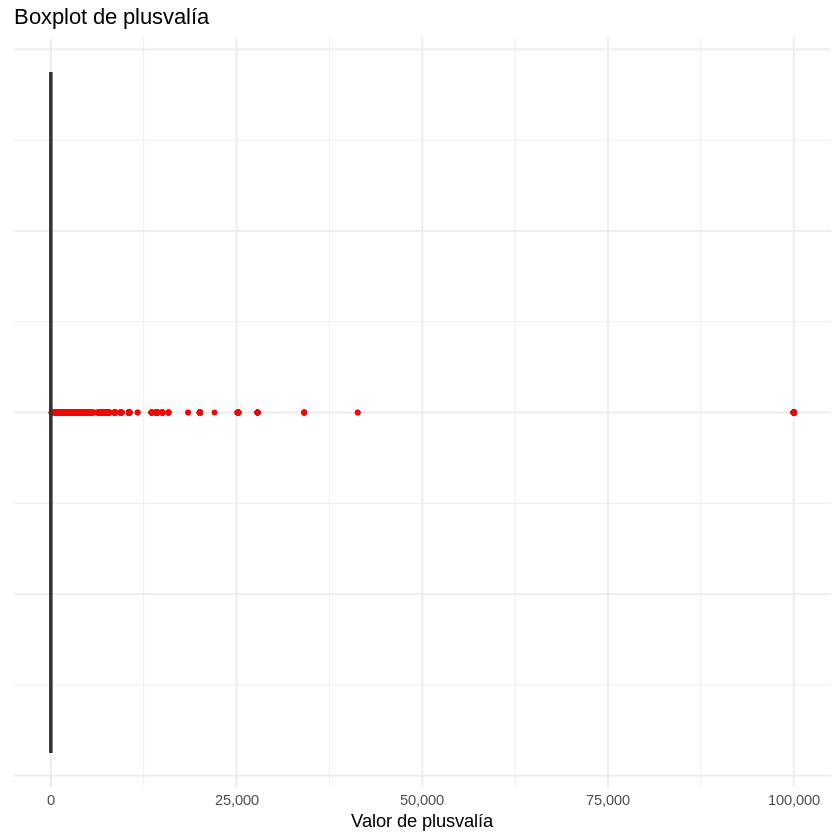

In [12]:
# Cargar bibliotecas necesarias
library(ggplot2)

# Identificar todas las columnas numéricas
columnas_numericas <- names(original.dataset)[sapply(original.dataset, is.numeric)]
print("Columnas numéricas identificadas:")
print(columnas_numericas)

# Función para crear boxplots y análisis estadístico para variables numéricas
analizar_numericas <- function(dataset, columnas) {
  # Lista para almacenar resultados
  resultados <- list()

  # Analizar cada columna numérica
  for(col in columnas) {
    # Estadísticas básicas
    cat("\nEstadísticas para", col, ":\n")

    # Calcular estadísticas
    stats <- summary(dataset[[col]])
    print(stats)

    # Varianza y desviación estándar
    var_val <- var(dataset[[col]])
    sd_val <- sd(dataset[[col]])

    cat("Desviación estándar:", sd_val, "\n")
    cat("Varianza:", var_val, "\n")

    # Asimetría y curtosis
    # Usando función básica para asimetría
    asimetria <- function(x) {
      n <- length(x)
      m <- mean(x)
      s <- sd(x)
      sum((x-m)^3)/(n*s^3)
    }

    # Curtosis
    curtosis <- function(x) {
      n <- length(x)
      m <- mean(x)
      s <- sd(x)
      sum((x-m)^4)/(n*s^4) - 3
    }

    asim_val <- asimetria(dataset[[col]])
    curt_val <- curtosis(dataset[[col]])

    cat("Coeficiente de asimetría:", asim_val, "\n")
    cat("Curtosis:", curt_val, "\n")

    # Valores atípicos (outliers)
    q1 <- quantile(dataset[[col]], 0.25)
    q3 <- quantile(dataset[[col]], 0.75)
    iqr <- q3 - q1

    limite_inf <- q1 - 1.5 * iqr
    limite_sup <- q3 + 1.5 * iqr

    outliers <- dataset[[col]][dataset[[col]] < limite_inf | dataset[[col]] > limite_sup]

    cat("Número de valores atípicos:", length(outliers), "\n")
    cat("Porcentaje de valores atípicos:", 100 * length(outliers) / length(dataset[[col]]), "%\n")

    # Crear boxplot con ggplot2
    p <- ggplot(dataset, aes(y = get(col))) +
      geom_boxplot(fill = "skyblue", outlier.color = "red", outlier.size = 1) +
      theme_minimal() +
      labs(title = paste("Boxplot de", col),
           y = col,
           caption = paste("Media =", round(mean(dataset[[col]]), 2),
                          ", Mediana =", median(dataset[[col]]),
                          ", Desv. Est. =", round(sd_val, 2))) +
      theme(axis.title.x = element_blank(),
            axis.text.x = element_blank(),
            axis.ticks.x = element_blank())

    # Guardar el gráfico como imagen
    ggsave(paste0("boxplot_", col, ".png"), p, width = 8, height = 6)

    # Mostrar el gráfico
    print(p)

    # Crear histograma
    h <- ggplot(dataset, aes(x = get(col))) +
      geom_histogram(bins = 30, fill = "lightgreen", color = "darkgreen") +
      theme_minimal() +
      labs(title = paste("Histograma de", col),
           x = col,
           y = "Frecuencia")

    # Mostrar el histograma
    print(h)

    # Almacenar resultados
    resultados[[col]] <- list(
      media = mean(dataset[[col]]),
      mediana = median(dataset[[col]]),
      desv_est = sd_val,
      asimetria = asim_val,
      curtosis = curt_val,
      outliers_count = length(outliers),
      outliers_percent = 100 * length(outliers) / length(dataset[[col]])
    )
  }

  return(resultados)
}

# Analizar y generar gráficos para todas las variables numéricas
resultados_analisis <- analizar_numericas(original.dataset, columnas_numericas)

# Seleccionar e interpretar la variable más llamativa (usando plusvalía como ejemplo)
cat("\n\nAnálisis detallado de 'plusvalía':\n")

# Histograma con zoom para plusvalía
p1 <- ggplot(original.dataset, aes(x = plusvalía)) +
  geom_histogram(bins = 50, fill = "lightblue", color = "darkblue") +
  theme_minimal() +
  labs(title = "Distribución de plusvalía",
       x = "Valor de plusvalía",
       y = "Frecuencia") +
  scale_y_log10() +  # Escala logarítmica para ver mejor la distribución
  annotation_logticks(sides = "l")

print(p1)

# Boxplot horizontal mejorado para plusvalía
p2 <- ggplot(original.dataset, aes(x = plusvalía, y = 1)) +
  geom_boxplot(fill = "skyblue", outlier.color = "red", outlier.size = 1) +
  theme_minimal() +
  labs(title = "Boxplot de plusvalía",
       x = "Valor de plusvalía") +
  theme(axis.title.y = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank()) +
  scale_x_continuous(labels = scales::comma)

print(p2)

# Guardar el boxplot para incluir en el informe
ggsave("boxplot_plusvalia_detallado.png", p2, width = 10, height = 4)

# Información adicional sobre los valores extremos
cat("\nValores extremos de plusvalía:\n")
extremos_max <- head(sort(original.dataset$plusvalía, decreasing = TRUE), 10)
extremos_min <- head(sort(original.dataset$plusvalía), 10)

cat("10 valores más altos:\n")
print(extremos_max)

cat("\n10 valores más bajos:\n")
print(extremos_min)

# Cálculo de percentiles para entender mejor la distribución
cat("\nPercentiles de plusvalía:\n")
percentiles <- quantile(original.dataset$plusvalía,
                        probs = c(0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99))
print(percentiles)

# Respuesta a la Pregunta 2.5

Tras analizar las seis variables numéricas del dataset de censo, seleccioné "plusvalía" como la más llamativa por presentar una distribución extraordinariamente asimétrica y peculiar. Esta variable destaca por varias características estadísticas significativas:
El boxplot de plusvalía revela una distribución extremadamente concentrada en un solo valor (cero), con el primer cuartil, la mediana y el tercer cuartil todos iguales a cero. Esto significa que al menos el 75% de los datos tienen valor cero, algo inusual en variables numéricas. Lo más llamativo es el coeficiente de asimetría extremadamente alto (11.95), muy por encima de cualquier otra variable del dataset, indicando una cola derecha excepcionalmente larga.

#Parte 2: Mejoras al dataset#

##Ejercicio 3: Limpieza y refinamiento del dataset

Según el ejercicio 2, particularmente observando los atributos categóricos, aparecieron columnas con valores vacíos ("NA"), por lo que se vuelve importante tomar una decisión de cómo tratar los registros que tienen datos vacíos.

Una alternativa, especialmente válida cuando la proporción de casos con vacíos es baja (por ej, menos de un 10%), es eliminar los registros que tengan esos casos.

**Preguntas Ejercicio 3**

3.1   Mirando el resultado de la instrucción siguiente, ¿Ud. optaría por corregir datos incompletos o derechamente eliminar aquellas filas (y en este caso, cuántas serían aprox)? ¿Por qué?

3.2   Si opta por eliminar aquellas filas con datos incompletos, ¿cuántas filas quedarían?

**Explicación de comandos e instrucciones en R relevantes y útiles para esto**

Es válido buscar referencias en Internet que ayuden a usar estos comandos y responder las preguntas planteadas, aunque es posible que se resuelvan con lo siguiente.

*   *colnames(dataset)* permite obtener la lista de columnas del dataset de nombre 'dataset'
*   *sapply(dataset, function(x) sum(*condicion*))* aplica la condición a cada una de las celdas del dataset, obteniendo la suma por cada columna
*   Para detectar atributos con valores "no disponibles" la condicion de una celda x es: *is.na(x)*
*   Para eliminar filas con atributos "vacíos", se puede usar el comando: *clean.dataset <- na.omit(original.dataset)*

# Pregunta 3.1

[1] "Resumen de valores faltantes por columna:"
                   Variable NA_Count Empty_Count Question_Mark Total_Missing
ocupación         ocupación     1843           0             0          1843
clase_laboral clase_laboral     1836           0             0          1836
origen               origen      583           0             0           583
edad                   edad        0           0             0             0
peso_muestra   peso_muestra        0           0             0             0
educación         educación        0           0             0             0
num_educación num_educación        0           0             0             0
estado_civil   estado_civil        0           0             0             0
relación           relación        0           0             0             0
raza                   raza        0           0             0             0
género               género        0           0             0             0
plusvalía         plusvalía 

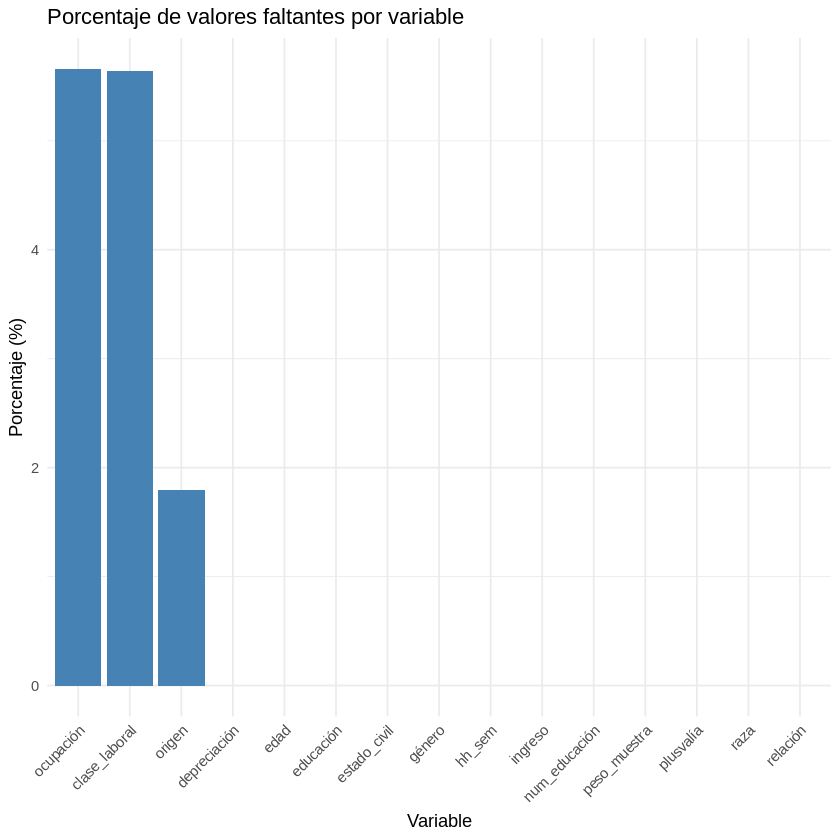

In [13]:
# Análisis completo de valores NA en el dataset

# Función para identificar diferentes tipos de valores faltantes
check_missing <- function(data) {
  # Crear un data frame para almacenar resultados
  missing_summary <- data.frame(
    Variable = names(data),
    NA_Count = sapply(data, function(x) sum(is.na(x))),
    Empty_Count = sapply(data, function(x) if(is.character(x)) sum(x == "" | x == " ", na.rm = TRUE) else 0),
    Question_Mark = sapply(data, function(x) if(is.character(x)) sum(grepl("\\?", x), na.rm = TRUE) else 0)
  )

  # Calcular total de valores faltantes
  missing_summary$Total_Missing <- missing_summary$NA_Count +
                                 missing_summary$Empty_Count +
                                 missing_summary$Question_Mark

  # Calcular porcentaje
  missing_summary$Percentage <- round((missing_summary$Total_Missing / nrow(data)) * 100, 2)

  # Ordenar por porcentaje de mayor a menor
  missing_summary <- missing_summary[order(-missing_summary$Percentage), ]

  return(missing_summary)
}

# Aplicar la función al dataset
missing_analysis <- check_missing(original.dataset)

# Mostrar resumen
print("Resumen de valores faltantes por columna:")
print(missing_analysis)

# Contar registros con al menos un valor faltante
rows_with_na <- sum(apply(original.dataset, 1, function(x) any(is.na(x) | (x == " ?" & is.character(x)))))
percentage_rows_with_na <- round((rows_with_na / nrow(original.dataset)) * 100, 2)

cat("\nRegistros con al menos un valor faltante:", rows_with_na,
    "(", percentage_rows_with_na, "% del total)\n")

# Visualizar la distribución de valores faltantes
library(ggplot2)

# Crear gráfico de barras de porcentajes de valores faltantes
ggplot(missing_analysis, aes(x = reorder(Variable, -Percentage), y = Percentage)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Porcentaje de valores faltantes por variable",
       x = "Variable",
       y = "Porcentaje (%)")

# Análisis adicional de las variables con valores faltantes
missing_vars <- missing_analysis$Variable[missing_analysis$Total_Missing > 0]

if(length(missing_vars) > 0) {
  cat("\nVariables con valores faltantes:\n")
  for(var in missing_vars) {
    cat("Variable:", var, "\n")
    cat("Valores faltantes:", missing_analysis$Total_Missing[missing_analysis$Variable == var],
        "(", missing_analysis$Percentage[missing_analysis$Variable == var], "%)\n")

    # Mostrar distribución de la variable si es categórica
    if(is.character(original.dataset[[var]])) {
      cat("Distribución de valores (excluyendo faltantes):\n")
      print(table(original.dataset[[var]][!is.na(original.dataset[[var]]) &
                                        original.dataset[[var]] != " ?"]))
    }
    cat("\n")
  }

  # Evaluar el impacto de eliminar filas con valores faltantes
  cat("Impacto de eliminar filas con valores faltantes:\n")
  cat("- Filas actuales:", nrow(original.dataset), "\n")
  dataset_completo <- na.omit(original.dataset)
  cat("- Filas después de eliminar registros incompletos:", nrow(dataset_completo), "\n")
  cat("- Filas eliminadas:", nrow(original.dataset) - nrow(dataset_completo),
      "(", round((nrow(original.dataset) - nrow(dataset_completo)) / nrow(original.dataset) * 100, 2), "%)\n")

  if(percentage_rows_with_na < 10) {
    cat("\nRecomendación: Dado que menos del 10% de los registros contienen valores faltantes,")
    cat("\nsería razonable eliminar estos registros para simplificar el análisis.")
  } else {
    cat("\nRecomendación: Más del 10% de los registros contienen valores faltantes,")
    cat("\npor lo que eliminarlos podría introducir sesgos. Considere métodos de imputación.")
  }
} else {
  cat("\nNo se encontraron variables con valores faltantes en el dataset.\n")
}

# Respuesta a la Pregunta 3.1:

Dado que la pregunta 2 escogida con anterioridad fue educación y no tenía valores nulos, en este caso se procedió a identificar las columnas con valores nulos en el dataset, que según el análisis son: ocupación (5.66%), clase_laboral (5.64%) y origen (1.79%). Los valores nulos afectan a un total de 2,399 registros, lo que representa el 7.37% del total de observaciones. Por lo tanto, considerando que este porcentaje está por debajo del umbral del 10% establecido como criterio de significancia, sería razonable eliminar estos registros incompletos para simplificar el análisis posterior. Esta decisión permitiría trabajar con un dataset limpio de 30,162 registros sin comprometer significativamente la representatividad de los datos ni introducir sesgos importantes en el análisis.

# Pregunta 3.2

In [14]:
# Código para contar y eliminar filas con datos incompletos

# Verificar número de filas originales
original_rows <- nrow(original.dataset)
cat("Número original de filas:", original_rows, "\n")

# Verificar columnas con valores NA
na_por_columna <- sapply(original.dataset, function(x) sum(is.na(x)))
cat("\nValores NA por columna:\n")
print(na_por_columna)

# Contar filas con al menos un NA
filas_con_na <- sum(apply(original.dataset, 1, function(x) any(is.na(x))))
cat("\nFilas con al menos un valor NA:", filas_con_na,
   "(", round(filas_con_na/original_rows*100, 2), "%)\n")

# Eliminar filas con datos incompletos
clean_dataset <- na.omit(original.dataset)

# Verificar número de filas después de la limpieza
clean_rows <- nrow(clean_dataset)
cat("\nNúmero de filas después de eliminar datos incompletos:", clean_rows, "\n")

# Calcular filas eliminadas
filas_eliminadas <- original_rows - clean_rows
cat("Filas eliminadas:", filas_eliminadas,
   "(", round(filas_eliminadas/original_rows*100, 2), "%)\n")

# Verificar que no queden valores NA
na_despues <- sum(sapply(clean_dataset, function(x) sum(is.na(x))))
cat("\n¿Quedan valores NA en el dataset limpio?", ifelse(na_despues == 0, "No", "Sí"), "\n")

Número original de filas: 32561 

Valores NA por columna:
         edad clase_laboral  peso_muestra     educación num_educación 
            0          1836             0             0             0 
 estado_civil     ocupación      relación          raza        género 
            0          1843             0             0             0 
    plusvalía  depreciación        hh_sem        origen       ingreso 
            0             0             0           583             0 

Filas con al menos un valor NA: 2399 ( 7.37 %)

Número de filas después de eliminar datos incompletos: 30162 
Filas eliminadas: 2399 ( 7.37 %)

¿Quedan valores NA en el dataset limpio? No 


# Respuesta a la Pregunta 3.2:

Basado en los resultados mostrados en el documento anterior, después de eliminar las filas con datos incompletos, quedarían 30,162 filas en el dataset limpio, lo que significa que se eliminarían 2,399 filas (7.37% del total original).

In [15]:
# A continuación agregar las instrucciones para resolver las preguntas indicadas
sapply(original.dataset, function(x) sum(is.na(x)))

edad clase_laboral  peso_muestra     educación num_educación 
            0          1836             0             0             0 
 estado_civil     ocupación      relación          raza        género 
            0          1843             0             0             0 
    plusvalía  depreciación        hh_sem        origen       ingreso 
            0             0             0           583             0


---


## Complemento (opcional): Exploración de posibles correlaciones

Entre los atributos, intuitivamente se pueden definir algunas relaciones, como el hecho de que hacer más horas de trabajo a la semana, resulte en mayor ingreso. Esto se puede visualizar con el gráfico de correlación que se indica a continuación. Nótese que sólo se comparan atributos numéricos, buscando cuantificar la eventual correlación entre ellos.

La matriz de correlación muestra el coeficiente de correlación entre dos atributos, cuyo valor cercano a 0 implica que no hay correlación, mientras que cercano a 1 indica una correlación absoluta. Esto puede servir para analizar pares de atributos que podrían ver cómo relacionarlos con la variable de interés (ingreso).

In [16]:
# Sección complementaria: generación de matriz de correlación
# ===========================================================
# Esta primera línea de código es para instalar la librería corrplot. Se ejecuta una sola vez
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



corrplot 0.95 loaded



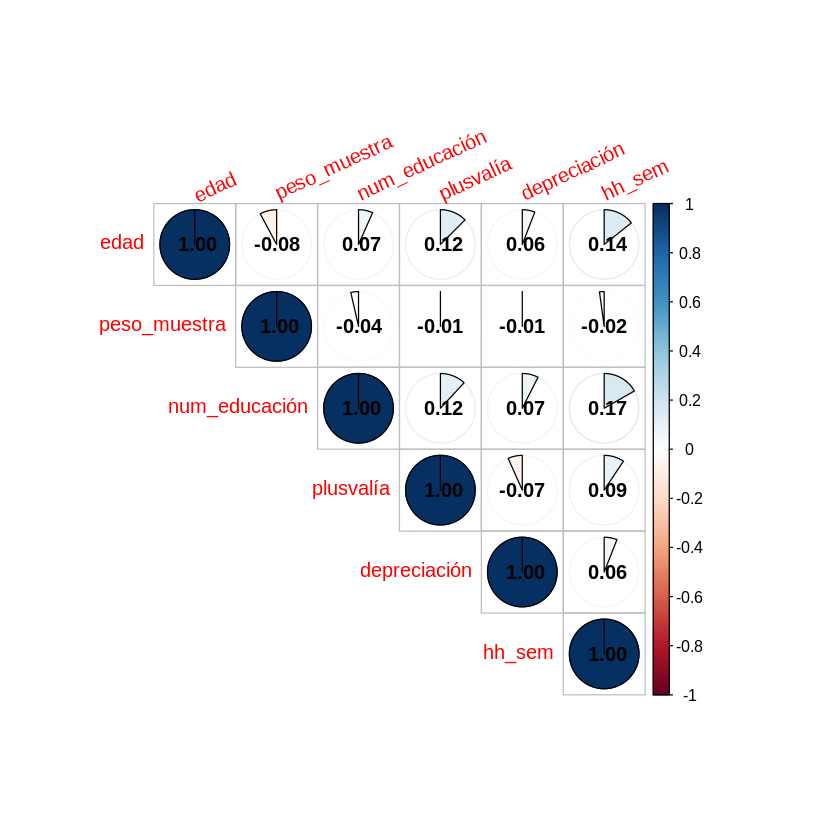

In [17]:
# Código para ejecutar y obtener una matriz de correlación
# Nótese que se consideran sólo atributos de cierto tipo (1, 3, 5, 11, 12, 13) son correlacionables
# 1: "edad", 3: "peso_muestra", 5: "num_educación"
# 11: "plusvalía", 12: "depreciación", 13: "hh_sem"

library("corrplot")

cor <- cor(original.dataset[c(1, 3, 5, 11:13)], method = "spearman")
corrplot(cor, method = "pie", tl.srt = 25, type ="upper", addCoef.col = "black", diag = TRUE)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




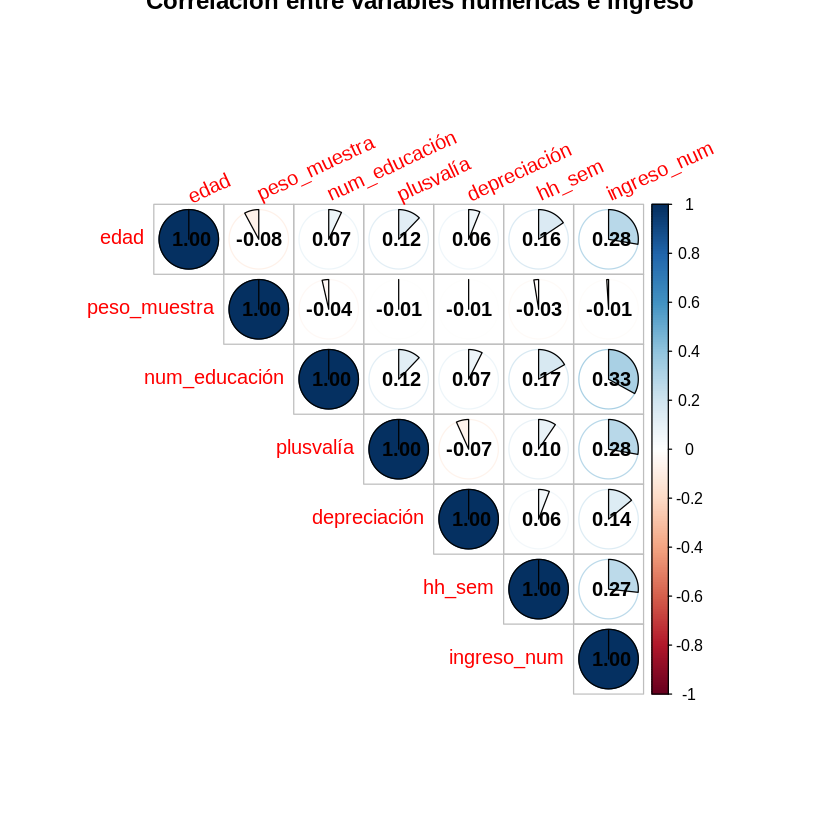

[1] "Correlaciones con ingreso ordenadas de mayor a menor:"
  ingreso_num num_educación     plusvalía          edad        hh_sem 
   1.00000000    0.32990999    0.27791691    0.27677764    0.26724477 
 depreciación  peso_muestra 
   0.14026845   -0.01003364 


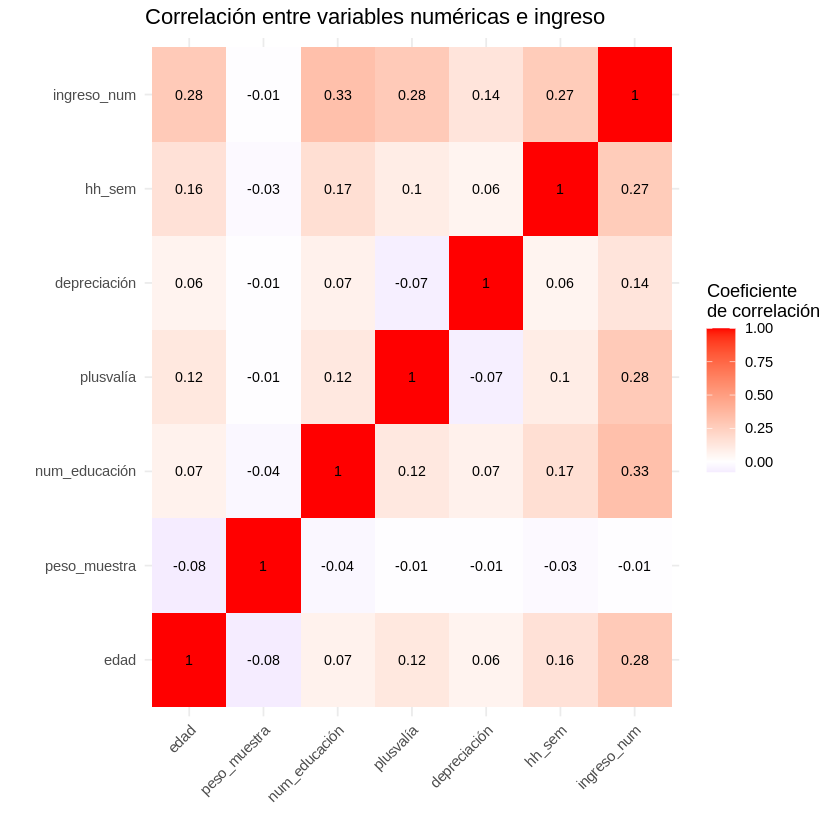

In [19]:
# Instalar los paquetes necesarios (ejecutar solo una vez)
install.packages("corrplot")
install.packages("reshape2")

# Cargar las bibliotecas necesarias
library(corrplot)
library(reshape2)

# 1. Convertir la variable categórica "ingreso" a numérica
# Crear una nueva columna que represente el ingreso como variable binaria
original.dataset$ingreso_num <- ifelse(original.dataset$ingreso == " >50K", 1, 0)

# 2. Crear una matriz de correlación con todas las variables numéricas
# incluyendo la nueva variable ingreso_num
variables_numericas <- c(1, 3, 5, 11:13, ncol(original.dataset))  # Incluimos ingreso_num

# 3. Eliminar filas con valores NA para asegurar que la correlación funcione correctamente
dataset_clean <- na.omit(original.dataset)

# 4. Calcular y visualizar la matriz de correlación
cor_matrix <- cor(dataset_clean[variables_numericas], method = "spearman")
corrplot(cor_matrix, method = "pie", tl.srt = 25, type = "upper",
         addCoef.col = "black", diag = TRUE,
         title = "Correlación entre variables numéricas e ingreso")

# 5. Visualización alternativa con mapa de calor
# Convertir la matriz de correlación a formato largo para ggplot
cor_melted <- melt(cor_matrix)

# Crear mapa de calor con ggplot2
library(ggplot2)
ggplot(cor_melted, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  geom_text(aes(label = round(value, 2)), color = "black", size = 3) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Correlación entre variables numéricas e ingreso",
       x = "", y = "", fill = "Coeficiente\nde correlación")

# 6. Análisis específico de correlaciones con ingreso
correlaciones_con_ingreso <- cor_matrix["ingreso_num", ]
correlaciones_ordenadas <- sort(correlaciones_con_ingreso, decreasing = TRUE)
print("Correlaciones con ingreso ordenadas de mayor a menor:")
print(correlaciones_ordenadas)

In [24]:
system("jupyter nbconvert --to html '/content/Actividad_I__David_Hospinal.ipynb'")